In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df1=pd.read_csv('Current Clients Report - 2021-07-02.csv')

In [5]:
df2=pd.read_csv('Closed Won since 01-01-2019.csv')

In [6]:
df3=pd.read_csv('Total Pipeline Report (All Types) - 2021-07-02.csv')

In [7]:
df4=pd.merge(df1, df2, how='outer',on='Account Name')

In [8]:
df5=pd.merge(df3, df1, how='outer',on='Account Name')

In [9]:
df4

,Account Owner,Account Name,Account Size,FTE Headcount,Account Type,Last Activity,Billing State/Province,Sales Territory,Account Status,Opportunity Owner,...,Total Contract Value (TCV),Close Date,Term Length,License Type,Billing Model,Stage,Age,Created Date,Fiscal Period,Type
0,Tyler Rohrbaugh,Villanova University,MM,6819.0,Higher Ed,2007/1/21,NaN,Northeast,Subscribed Client,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tyler Rohrbaugh,Harvard Graduate School of Education,MM,NaN,Higher Ed,2005/6/21,NaN,Northeast,Subscribed Client,Tyler Rohrbaugh,...,4500.00,3/19/2020,12.0,NaN,NaN,Closed Won,49.0,1/30/2020,Q1-2020,Client Expansion
2,Tyler Rohrbaugh,Harvard Graduate School of Education,MM,NaN,Higher Ed,2005/6/21,NaN,Northeast,Subscribed Client,Tyler Rohrbaugh,...,13500.00,4/30/2020,36.0,NaN,NaN,Closed Won,35.0,3/26/2020,Q2-2020,Client Expansion
3,Tyler Rohrbaugh,Online Education Services,SMB,1400.0,Higher Ed,2007/1/21,NaN,International,Subscribed Client,Tyler Rohrbaugh,...,15000.00,2/19/2019,12.0,NaN,NaN,Closed Won,14.0,2/5/2019,Q1-2019,New Logo - New
4,Tyler Rohrbaugh,Online Education Services,SMB,1400.0,Higher Ed,2007/1/21,NaN,International,Subscribed Client,Tyler Rohrbaugh,...,52500.00,1/6/2019,12.0,NaN,NaN,Closed Won,461.0,10/3/2017,Q1-2019,New Logo - New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,NaN,eCornell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tyler Rohrbaugh,...,10000.00,10/1/2019,6.0,NaN,NaN,Closed Won,1.0,9/30/2019,Q4-2019,New Logo - New
177,NaN,MITX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tyler Rohrbaugh,...,60000.00,10/1/2019,12.0,NaN,NaN,Closed Won,348.0,10/19/2018,Q4-2019,New Logo - New
178,NaN,DeVry University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steve Davis,...,0.00,1/21/2020,6.0,NaN,NaN,Closed Won,92.0,10/21/2019,Q1-2020,New Logo - New
179,NaN,University of Central Florida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Randy Sealy,...,300.00,1/5/2021,6.0,NaN,NaN,Closed Won,0.0,1/5/2021,Q1-2021,New Logo - New


In [10]:
df4['FTE Headcount'] = df4['FTE Headcount'].fillna((df4['FTE Headcount'].mean()))
df4['Amount'] = df4['Amount'].fillna((df4['Amount'].mean()))
df4['Total Contract Value (TCV)'] = df4['Total Contract Value (TCV)'].fillna((df4['Total Contract Value (TCV)'].mean()))
df4['Term Length'] = df4['Term Length'].fillna((df4['Term Length'].mean()))
df4['Age'] = df4['Age'].fillna((df4['Age'].mean()))
df4['Last Activity'] = df4['Last Activity'].fillna(df4['Last Activity'].mode()[0])




In [11]:
df5['FTE Headcount_x'] = df5['FTE Headcount_x'].fillna((df5['FTE Headcount_x'].mean()))
df5['Amount'] = df5['Amount'].fillna((df5['Amount'].mean()))
df5['Total Contract Value (TCV)'] = df5['Total Contract Value (TCV)'].fillna((df5['Total Contract Value (TCV)'].mean()))
df5['Probability (%)'] = df5['Probability (%)'].fillna((df5['Probability (%)'].mean()))
df5['Term Length'] = df5['Term Length'].fillna((df5['Term Length'].mean()))
df5['Age'] = df5['Age'].fillna((df5['Age'].mean()))
df5['FTE Headcount_y'] = df5['FTE Headcount_y'].fillna((df5['FTE Headcount_y'].mean()))
df5['Expected Revenue'] = df5['Expected Revenue'].fillna((df5['Expected Revenue'].mean()))

In [12]:
df5['Last Activity'] = df5['Last Activity'].fillna(df5['Last Activity'].mode()[0])

In [13]:
df5

,Opportunity Owner,Account Name,FTE Headcount_x,Opportunity Name,Type,Lead Source,Amount,Expected Revenue,Total Contract Value (TCV),Stage,...,Age,Fiscal Period,Account Owner,Account Size,FTE Headcount_y,Account Type,Last Activity,Billing State/Province,Sales Territory,Account Status
0,Tyler Rohrbaugh,Green Flower Media,14414.6,Green Flower - 2023 Renewal,Client Renewal,Client-Current,5000.000000,2000.000000,5000.000000,Evaluation,...,434.000000,Q2-2021,Tyler Rohrbaugh,SMB,13880.776596,Corporate,2002/2/21,CA,West,Subscribed Client
1,Tyler Rohrbaugh,Harvard Graduate School of Education,14414.6,Harvard GSE HPL Course - 2021 Renewal,Client Renewal,Client-Current,4500.000000,900.000000,4500.000000,Initiate & Educate,...,470.000000,Q2-2021,Tyler Rohrbaugh,MM,13880.776596,Higher Ed,2005/6/21,NaN,Northeast,Subscribed Client
2,Tyler Rohrbaugh,Harvard Graduate School of Education,14414.6,Harvard GSE - PPE - 2023 Renewal,Client Renewal,Client-Current,4500.000000,1800.000000,4500.000000,Evaluation,...,427.000000,Q2-2023,Tyler Rohrbaugh,MM,13880.776596,Higher Ed,2005/6/21,NaN,Northeast,Subscribed Client
3,Kailie Starr,Midwest College of Oriental Medicine,500.0,Midwest College of Oriental Medicine - 2021 Re...,Client Renewal,Client-Current,4050.000000,1620.000000,4050.000000,Evaluation,...,445.000000,Q2-2021,Kailie Starr,SMB,500.000000,Higher Ed,2006/8/21,NaN,Mid-West,Subscribed Client
4,Tyler Rohrbaugh,Arizona State University,42529.0,ASU - Annual SSO Integration Fee,Client Expansion,Conference,5000.000000,3750.000000,5000.000000,Verbal Yes,...,53.000000,Q3-2021,Tyler Rohrbaugh,ENT,42529.000000,Higher Ed,2007/1/21,AZ,West,Subscribed Client
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,NaN,Western New England University College of Busi...,14414.6,NaN,NaN,NaN,14976.987658,5802.382342,19250.813111,NaN,...,235.261261,NaN,Kailie Starr,NaN,7000.000000,Higher Ed,6/28/21,MA,Northeast,Publisher Client
120,NaN,Drexel - Master's in Television and Media Program,14414.6,NaN,NaN,NaN,14976.987658,5802.382342,19250.813111,NaN,...,235.261261,NaN,Tyler Rohrbaugh,NaN,500.000000,Higher Ed,2007/2/21,PA,Northeast,Publisher Client
121,NaN,University of South Carolina - Darla Moore Sch...,14414.6,NaN,NaN,NaN,14976.987658,5802.382342,19250.813111,NaN,...,235.261261,NaN,Jim Gandolfo,ENT,6400.000000,Higher Ed,2007/1/21,SC,South East,Publisher Client
122,NaN,University of South Carolina - Columbia,14414.6,NaN,NaN,NaN,14976.987658,5802.382342,19250.813111,NaN,...,235.261261,NaN,Jim Gandolfo,ENT,34795.000000,Higher Ed,6/24/21,SC,South,Publisher Client


In [14]:
df4.to_csv('combine1.csv')
df5.to_csv('combine2.csv')

In [115]:
df_dummies1 = pd.get_dummies(df4, columns=['Account Owner',
                                         'Account Size','Account Type','Billing State/Province','Sales Territory','Account Status',
                                        'Opportunity Owner','Lead Source','License Type','Billing Model',
                                         'Stage','Fiscal Period','Type'])

df_dummies2 = pd.get_dummies(df5, columns=['Opportunity Owner','Lead Source','License Type','Billing Model','Billing State/Province',
                                         'Stage','Type','Account Type','Sales Territory','Account Status','Fiscal Period','Account Size'])


In [16]:
df_dummies1

,Account Name,FTE Headcount,Last Activity,Opportunity Name,Amount,Total Contract Value (TCV),Close Date,Term Length,Age,Created Date,...,Fiscal Period_Q3-2021,Fiscal Period_Q4-2019,Fiscal Period_Q4-2020,Fiscal Period_Q4-2021,Type_Client Expansion,Type_Client Renewal,Type_Existing Business,Type_New Logo - Existing,Type_New Logo - New,Type_One Time Fee (OTF)
0,Villanova University,6819.000000,2007/1/21,NaN,10147.99477,25631.902622,NaN,74.597701,133.706897,NaN,...,0,0,0,0,0,0,0,0,0,0
1,Harvard Graduate School of Education,12318.992188,2005/6/21,"Havard GSE - 2020/2021 ""POC"" License - HPL Course",4500.00000,4500.000000,3/19/2020,12.000000,49.000000,1/30/2020,...,0,0,0,0,1,0,0,0,0,0
2,Harvard Graduate School of Education,12318.992188,2005/6/21,Harvard GSE - Professional Education - Custom ...,4500.00000,13500.000000,4/30/2020,36.000000,35.000000,3/26/2020,...,0,0,0,0,1,0,0,0,0,0
3,Online Education Services,1400.000000,2007/1/21,OES - Swinbourne Online - Micro Units Project,10000.00000,15000.000000,2/19/2019,12.000000,14.000000,2/5/2019,...,0,0,0,0,0,0,0,0,1,0
4,Online Education Services,1400.000000,2007/1/21,Online Educational Services - Informal Learnin...,20000.00000,52500.000000,1/6/2019,12.000000,461.000000,10/3/2017,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,eCornell,12318.992188,2007/1/21,eCornell - 2020 Starter License (Implementatio...,0.00000,10000.000000,10/1/2019,6.000000,1.000000,9/30/2019,...,0,1,0,0,0,0,0,0,1,0
177,MITX,12318.992188,2007/1/21,"xPRO - Boeing + Open, Leadership Courses - V2 ...",60000.00000,60000.000000,10/1/2019,12.000000,348.000000,10/19/2018,...,0,1,0,0,0,0,0,0,1,0
178,DeVry University,12318.992188,2007/1/21,DeVry University - 2020 LOI Proof of Concept,0.00000,0.000000,1/21/2020,6.000000,92.000000,10/21/2019,...,0,0,0,0,0,0,0,0,1,0
179,University of Central Florida,12318.992188,2007/1/21,UCF - PAD 6716 Spring 2021 - Student Pay,0.00000,300.000000,1/5/2021,6.000000,0.000000,1/5/2021,...,0,0,0,0,0,0,0,0,1,0


In [17]:
df_dummies1.describe()

,FTE Headcount,Amount,Total Contract Value (TCV),Term Length,Age,Account Owner_Gerry Meyle,Account Owner_Jamie Snow,Account Owner_Jim Gandolfo,Account Owner_Kailie Starr,Account Owner_Kevin Crossland,...,Fiscal Period_Q3-2021,Fiscal Period_Q4-2019,Fiscal Period_Q4-2020,Fiscal Period_Q4-2021,Type_Client Expansion,Type_Client Renewal,Type_Existing Business,Type_New Logo - Existing,Type_New Logo - New,Type_One Time Fee (OTF)
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,...,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,12318.992188,10147.994770,25631.902622,74.597701,133.706897,0.116022,0.005525,0.193370,0.160221,0.005525,...,0.005525,0.088398,0.165746,0.005525,0.314917,0.176796,0.005525,0.016575,0.430939,0.016575
std,11673.216674,14901.223107,40768.722371,742.071754,168.187462,0.321140,0.074329,0.396036,0.367828,0.074329,...,0.074329,0.284660,0.372884,0.074329,0.465771,0.382554,0.074329,0.128025,0.496581,0.128025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3978.000000,248.750000,1000.000000,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12318.992188,5000.000000,14400.000000,12.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12318.992188,14625.000000,25631.902622,36.000000,169.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,58000.000000,100000.000000,340000.000000,10000.000000,796.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
def f(row):
    if (row['Total Contract Value (TCV)']>=25631):
        val='d'
    elif(row['Total Contract Value (TCV)']>=14400):
        val='c'
    elif(row['Total Contract Value (TCV)']>=1000):
        val='b'
    else:
        val='a'
    return val

df_dummies1['Band']=df_dummies1.apply(f, axis=1)

In [19]:
df_dummies1

,Account Name,FTE Headcount,Last Activity,Opportunity Name,Amount,Total Contract Value (TCV),Close Date,Term Length,Age,Created Date,...,Fiscal Period_Q4-2019,Fiscal Period_Q4-2020,Fiscal Period_Q4-2021,Type_Client Expansion,Type_Client Renewal,Type_Existing Business,Type_New Logo - Existing,Type_New Logo - New,Type_One Time Fee (OTF),Band
0,Villanova University,6819.000000,2007/1/21,NaN,10147.99477,25631.902622,NaN,74.597701,133.706897,NaN,...,0,0,0,0,0,0,0,0,0,d
1,Harvard Graduate School of Education,12318.992188,2005/6/21,"Havard GSE - 2020/2021 ""POC"" License - HPL Course",4500.00000,4500.000000,3/19/2020,12.000000,49.000000,1/30/2020,...,0,0,0,1,0,0,0,0,0,b
2,Harvard Graduate School of Education,12318.992188,2005/6/21,Harvard GSE - Professional Education - Custom ...,4500.00000,13500.000000,4/30/2020,36.000000,35.000000,3/26/2020,...,0,0,0,1,0,0,0,0,0,b
3,Online Education Services,1400.000000,2007/1/21,OES - Swinbourne Online - Micro Units Project,10000.00000,15000.000000,2/19/2019,12.000000,14.000000,2/5/2019,...,0,0,0,0,0,0,0,1,0,c
4,Online Education Services,1400.000000,2007/1/21,Online Educational Services - Informal Learnin...,20000.00000,52500.000000,1/6/2019,12.000000,461.000000,10/3/2017,...,0,0,0,0,0,0,0,1,0,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,eCornell,12318.992188,2007/1/21,eCornell - 2020 Starter License (Implementatio...,0.00000,10000.000000,10/1/2019,6.000000,1.000000,9/30/2019,...,1,0,0,0,0,0,0,1,0,b
177,MITX,12318.992188,2007/1/21,"xPRO - Boeing + Open, Leadership Courses - V2 ...",60000.00000,60000.000000,10/1/2019,12.000000,348.000000,10/19/2018,...,1,0,0,0,0,0,0,1,0,d
178,DeVry University,12318.992188,2007/1/21,DeVry University - 2020 LOI Proof of Concept,0.00000,0.000000,1/21/2020,6.000000,92.000000,10/21/2019,...,0,0,0,0,0,0,0,1,0,a
179,University of Central Florida,12318.992188,2007/1/21,UCF - PAD 6716 Spring 2021 - Student Pay,0.00000,300.000000,1/5/2021,6.000000,0.000000,1/5/2021,...,0,0,0,0,0,0,0,1,0,a


In [20]:
df_dummies2

,Account Name,FTE Headcount_x,Opportunity Name,Amount,Expected Revenue,Total Contract Value (TCV),Probability (%),Term Length,Close Date,Age,...,Fiscal Period_Q3-2021,Fiscal Period_Q3-2022,Fiscal Period_Q3-2023,Fiscal Period_Q3-2024,Fiscal Period_Q4-2021,Fiscal Period_Q4-2022,Fiscal Period_Q4-2023,Account Size_ENT,Account Size_MM,Account Size_SMB
0,Green Flower Media,14414.6,Green Flower - 2023 Renewal,5000.000000,2000.000000,5000.000000,40.0,12.000000,4/22/2021,434.000000,...,0,0,0,0,0,0,0,0,0,1
1,Harvard Graduate School of Education,14414.6,Harvard GSE HPL Course - 2021 Renewal,4500.000000,900.000000,4500.000000,20.0,12.000000,5/31/2021,470.000000,...,0,0,0,0,0,0,0,0,1,0
2,Harvard Graduate School of Education,14414.6,Harvard GSE - PPE - 2023 Renewal,4500.000000,1800.000000,4500.000000,40.0,12.000000,4/29/2023,427.000000,...,0,0,0,0,0,0,0,0,1,0
3,Midwest College of Oriental Medicine,500.0,Midwest College of Oriental Medicine - 2021 Re...,4050.000000,1620.000000,4050.000000,40.0,12.000000,5/31/2021,445.000000,...,0,0,0,0,0,0,0,0,0,1
4,Arizona State University,42529.0,ASU - Annual SSO Integration Fee,5000.000000,3750.000000,5000.000000,75.0,12.000000,7/31/2021,53.000000,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Western New England University College of Busi...,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,0,0,0,0
120,Drexel - Master's in Television and Media Program,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,0,0,0,0
121,University of South Carolina - Darla Moore Sch...,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,0,1,0,0
122,University of South Carolina - Columbia,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,0,1,0,0


In [21]:
def f(row):
    if (row['Total Contract Value (TCV)']>=19250):
        val=1
    elif(row['Total Contract Value (TCV)']>=18370):
        val=2
    elif(row['Total Contract Value (TCV)']>=4000):
        val=3
    else:
        val=4
    return val

df_dummies2['Band']=df_dummies2.apply(f, axis=1)

In [22]:
df_dummies2['Band'] = pd.Categorical(df_dummies2.Band)

In [23]:
df_dummies2.dtypes

Account Name               object
FTE Headcount_x           float64
Opportunity Name           object
Amount                    float64
Expected Revenue          float64
                           ...   
Fiscal Period_Q4-2023       uint8
Account Size_ENT            uint8
Account Size_MM             uint8
Account Size_SMB            uint8
Band                     category
Length: 102, dtype: object

In [24]:
df_dummies2

,Account Name,FTE Headcount_x,Opportunity Name,Amount,Expected Revenue,Total Contract Value (TCV),Probability (%),Term Length,Close Date,Age,...,Fiscal Period_Q3-2022,Fiscal Period_Q3-2023,Fiscal Period_Q3-2024,Fiscal Period_Q4-2021,Fiscal Period_Q4-2022,Fiscal Period_Q4-2023,Account Size_ENT,Account Size_MM,Account Size_SMB,Band
0,Green Flower Media,14414.6,Green Flower - 2023 Renewal,5000.000000,2000.000000,5000.000000,40.0,12.000000,4/22/2021,434.000000,...,0,0,0,0,0,0,0,0,1,3
1,Harvard Graduate School of Education,14414.6,Harvard GSE HPL Course - 2021 Renewal,4500.000000,900.000000,4500.000000,20.0,12.000000,5/31/2021,470.000000,...,0,0,0,0,0,0,0,1,0,3
2,Harvard Graduate School of Education,14414.6,Harvard GSE - PPE - 2023 Renewal,4500.000000,1800.000000,4500.000000,40.0,12.000000,4/29/2023,427.000000,...,0,0,0,0,0,0,0,1,0,3
3,Midwest College of Oriental Medicine,500.0,Midwest College of Oriental Medicine - 2021 Re...,4050.000000,1620.000000,4050.000000,40.0,12.000000,5/31/2021,445.000000,...,0,0,0,0,0,0,0,0,1,3
4,Arizona State University,42529.0,ASU - Annual SSO Integration Fee,5000.000000,3750.000000,5000.000000,75.0,12.000000,7/31/2021,53.000000,...,0,0,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Western New England University College of Busi...,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,0,0,0,1
120,Drexel - Master's in Television and Media Program,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,0,0,0,1
121,University of South Carolina - Darla Moore Sch...,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,1,0,0,1
122,University of South Carolina - Columbia,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,1,0,0,1


In [25]:
df_dummies1['Last Activity'] = pd.to_datetime(df_dummies1['Last Activity'])

In [26]:
df_dummies1['Close Date'] = pd.to_datetime(df_dummies1['Close Date'])

In [27]:
df_dummies1['Created Date'] = pd.to_datetime(df_dummies1['Created Date'])

In [28]:
print(df_dummies1['Last Activity'])

0     2007-01-21
1     2005-06-21
2     2005-06-21
3     2007-01-21
4     2007-01-21
         ...    
176   2007-01-21
177   2007-01-21
178   2007-01-21
179   2007-01-21
180   2007-01-21
Name: Last Activity, Length: 181, dtype: datetime64[ns]


In [29]:
df_dummies1.to_csv('dummies1.csv')

In [30]:
df_dummies1

,Account Name,FTE Headcount,Last Activity,Opportunity Name,Amount,Total Contract Value (TCV),Close Date,Term Length,Age,Created Date,...,Fiscal Period_Q4-2019,Fiscal Period_Q4-2020,Fiscal Period_Q4-2021,Type_Client Expansion,Type_Client Renewal,Type_Existing Business,Type_New Logo - Existing,Type_New Logo - New,Type_One Time Fee (OTF),Band
0,Villanova University,6819.000000,2007-01-21,NaN,10147.99477,25631.902622,NaT,74.597701,133.706897,NaT,...,0,0,0,0,0,0,0,0,0,d
1,Harvard Graduate School of Education,12318.992188,2005-06-21,"Havard GSE - 2020/2021 ""POC"" License - HPL Course",4500.00000,4500.000000,2020-03-19,12.000000,49.000000,2020-01-30,...,0,0,0,1,0,0,0,0,0,b
2,Harvard Graduate School of Education,12318.992188,2005-06-21,Harvard GSE - Professional Education - Custom ...,4500.00000,13500.000000,2020-04-30,36.000000,35.000000,2020-03-26,...,0,0,0,1,0,0,0,0,0,b
3,Online Education Services,1400.000000,2007-01-21,OES - Swinbourne Online - Micro Units Project,10000.00000,15000.000000,2019-02-19,12.000000,14.000000,2019-02-05,...,0,0,0,0,0,0,0,1,0,c
4,Online Education Services,1400.000000,2007-01-21,Online Educational Services - Informal Learnin...,20000.00000,52500.000000,2019-01-06,12.000000,461.000000,2017-10-03,...,0,0,0,0,0,0,0,1,0,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,eCornell,12318.992188,2007-01-21,eCornell - 2020 Starter License (Implementatio...,0.00000,10000.000000,2019-10-01,6.000000,1.000000,2019-09-30,...,1,0,0,0,0,0,0,1,0,b
177,MITX,12318.992188,2007-01-21,"xPRO - Boeing + Open, Leadership Courses - V2 ...",60000.00000,60000.000000,2019-10-01,12.000000,348.000000,2018-10-19,...,1,0,0,0,0,0,0,1,0,d
178,DeVry University,12318.992188,2007-01-21,DeVry University - 2020 LOI Proof of Concept,0.00000,0.000000,2020-01-21,6.000000,92.000000,2019-10-21,...,0,0,0,0,0,0,0,1,0,a
179,University of Central Florida,12318.992188,2007-01-21,UCF - PAD 6716 Spring 2021 - Student Pay,0.00000,300.000000,2021-01-05,6.000000,0.000000,2021-01-05,...,0,0,0,0,0,0,0,1,0,a


In [31]:
df_dummies1=df_dummies1.drop(df_dummies1.index[175:181])

In [32]:
df_dummies1

,Account Name,FTE Headcount,Last Activity,Opportunity Name,Amount,Total Contract Value (TCV),Close Date,Term Length,Age,Created Date,...,Fiscal Period_Q4-2019,Fiscal Period_Q4-2020,Fiscal Period_Q4-2021,Type_Client Expansion,Type_Client Renewal,Type_Existing Business,Type_New Logo - Existing,Type_New Logo - New,Type_One Time Fee (OTF),Band
0,Villanova University,6819.000000,2007-01-21,NaN,10147.99477,25631.902622,NaT,74.597701,133.706897,NaT,...,0,0,0,0,0,0,0,0,0,d
1,Harvard Graduate School of Education,12318.992188,2005-06-21,"Havard GSE - 2020/2021 ""POC"" License - HPL Course",4500.00000,4500.000000,2020-03-19,12.000000,49.000000,2020-01-30,...,0,0,0,1,0,0,0,0,0,b
2,Harvard Graduate School of Education,12318.992188,2005-06-21,Harvard GSE - Professional Education - Custom ...,4500.00000,13500.000000,2020-04-30,36.000000,35.000000,2020-03-26,...,0,0,0,1,0,0,0,0,0,b
3,Online Education Services,1400.000000,2007-01-21,OES - Swinbourne Online - Micro Units Project,10000.00000,15000.000000,2019-02-19,12.000000,14.000000,2019-02-05,...,0,0,0,0,0,0,0,1,0,c
4,Online Education Services,1400.000000,2007-01-21,Online Educational Services - Informal Learnin...,20000.00000,52500.000000,2019-01-06,12.000000,461.000000,2017-10-03,...,0,0,0,0,0,0,0,1,0,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Missouri Southern State University,5122.000000,2007-01-21,MSSU-FTE-Freemium - 2020 Licence w/ Opt Out,25000.00000,25000.000000,2020-06-30,12.000000,43.000000,2020-05-18,...,0,0,0,0,0,0,0,1,0,c
171,Missouri Southern State University,5122.000000,2007-01-21,MSSU - 2021 Early Renewal,25000.00000,25000.000000,2020-10-14,12.000000,85.000000,2020-07-21,...,0,1,0,0,1,0,0,0,0,c
172,Missouri Southern State University,5122.000000,2007-01-21,MSSU - 2021 Early Renewal + 3-Year Expansion,8750.00000,126250.000000,2020-10-14,36.000000,99.000000,2020-07-07,...,0,1,0,1,0,0,0,0,0,d
173,Lubbock Christian University,1393.000000,2005-04-21,Lubbock Christian University - 2019 Renewal,13500.00000,48000.000000,2019-03-27,36.000000,482.000000,2017-11-30,...,0,0,0,0,1,0,0,0,0,d


In [33]:
df_dummies2['Close Date'] = pd.to_datetime(df_dummies2['Close Date'])

In [34]:
df_dummies2['Last Activity'] = pd.to_datetime(df_dummies2['Last Activity'])

In [35]:
df_dummies2.to_csv('dummies2.csv')

In [36]:
df_dummies1[['FTE Headcount', 'Amount','Total Contract Value (TCV)','Term Length','Age']]=StandardScaler().fit_transform(df_dummies1[['FTE Headcount', 'Amount','Total Contract Value (TCV)',
                                              'Term Length','Age']])


In [116]:
df_dummies2[['FTE Headcount_x', 'Amount','Expected Revenue','Total Contract Value (TCV)','Age','FTE Headcount_y']]=StandardScaler().fit_transform(df_dummies2[['FTE Headcount_x', 'Amount','Expected Revenue','Total Contract Value (TCV)','Age','FTE Headcount_y']])

In [38]:
df_dummies1

,Account Name,FTE Headcount,Last Activity,Opportunity Name,Amount,Total Contract Value (TCV),Close Date,Term Length,Age,Created Date,...,Fiscal Period_Q4-2019,Fiscal Period_Q4-2020,Fiscal Period_Q4-2021,Type_Client Expansion,Type_Client Renewal,Type_Existing Business,Type_New Logo - Existing,Type_New Logo - New,Type_One Time Fee (OTF),Band
0,Villanova University,-0.464573,2007-01-21,NaN,-0.000259,-0.007820,NaT,-0.003110,-0.008231,NaT,...,0,0,0,0,0,0,0,0,0,d
1,Harvard Graduate School of Education,0.000000,2005-06-21,"Havard GSE - 2020/2021 ""POC"" License - HPL Course",-0.388832,-0.521826,2020-03-19,-0.086298,-0.509863,2020-01-30,...,0,0,0,1,0,0,0,0,0,b
2,Harvard Graduate School of Education,0.000000,2005-06-21,Harvard GSE - Professional Education - Custom ...,-0.388832,-0.302913,2020-04-30,-0.054404,-0.592771,2020-03-26,...,0,0,0,1,0,0,0,0,0,b
3,Online Education Services,-0.922305,2007-01-21,OES - Swinbourne Online - Micro Units Project,-0.010441,-0.266427,2019-02-19,-0.086298,-0.717132,2019-02-05,...,0,0,0,0,0,0,0,1,0,c
4,Online Education Services,-0.922305,2007-01-21,Online Educational Services - Informal Learnin...,0.677542,0.645712,2019-01-06,-0.086298,1.929990,2017-10-03,...,0,0,0,0,0,0,0,1,0,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Missouri Southern State University,-0.607916,2007-01-21,MSSU-FTE-Freemium - 2020 Licence w/ Opt Out,1.021534,-0.023190,2020-06-30,-0.086298,-0.545395,2020-05-18,...,0,0,0,0,0,0,0,1,0,c
171,Missouri Southern State University,-0.607916,2007-01-21,MSSU - 2021 Early Renewal,1.021534,-0.023190,2020-10-14,-0.086298,-0.296672,2020-07-21,...,0,1,0,0,1,0,0,0,0,c
172,Missouri Southern State University,-0.607916,2007-01-21,MSSU - 2021 Early Renewal + 3-Year Expansion,-0.096439,2.439586,2020-10-14,-0.054404,-0.213765,2020-07-07,...,0,1,0,1,0,0,0,0,0,d
173,Lubbock Christian University,-0.922897,2005-04-21,Lubbock Christian University - 2019 Renewal,0.230353,0.536255,2019-03-27,-0.054404,2.054351,2017-11-30,...,0,0,0,0,1,0,0,0,0,d


In [117]:
from sklearn.cluster import KMeans
from pandas.tseries import converter
converter.register()

ImportError: cannot import name 'converter' from 'pandas.tseries' (/Users/lbchuan/opt/anaconda3/lib/python3.8/site-packages/pandas/tseries/__init__.py)

In [40]:
df_dummies1=df_dummies1.drop(columns=['Account Name', 'Opportunity Name','Close Date','Created Date'])



In [41]:
df_dummies1=df_dummies1.drop(columns=['Last Activity'])

In [42]:
df_dummies1=df_dummies1.drop(columns=['Band'])

In [43]:
df_dummies1

,FTE Headcount,Amount,Total Contract Value (TCV),Term Length,Age,Account Owner_Gerry Meyle,Account Owner_Jamie Snow,Account Owner_Jim Gandolfo,Account Owner_Kailie Starr,Account Owner_Kevin Crossland,...,Fiscal Period_Q3-2021,Fiscal Period_Q4-2019,Fiscal Period_Q4-2020,Fiscal Period_Q4-2021,Type_Client Expansion,Type_Client Renewal,Type_Existing Business,Type_New Logo - Existing,Type_New Logo - New,Type_One Time Fee (OTF)
0,-0.464573,-0.000259,-0.007820,-0.003110,-0.008231,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,-0.388832,-0.521826,-0.086298,-0.509863,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.000000,-0.388832,-0.302913,-0.054404,-0.592771,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.922305,-0.010441,-0.266427,-0.086298,-0.717132,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.922305,0.677542,0.645712,-0.086298,1.929990,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,-0.607916,1.021534,-0.023190,-0.086298,-0.545395,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
171,-0.607916,1.021534,-0.023190,-0.086298,-0.296672,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
172,-0.607916,-0.096439,2.439586,-0.054404,-0.213765,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
173,-0.922897,0.230353,0.536255,-0.054404,2.054351,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Text(0.5, 1.0, 'Elbow curve')

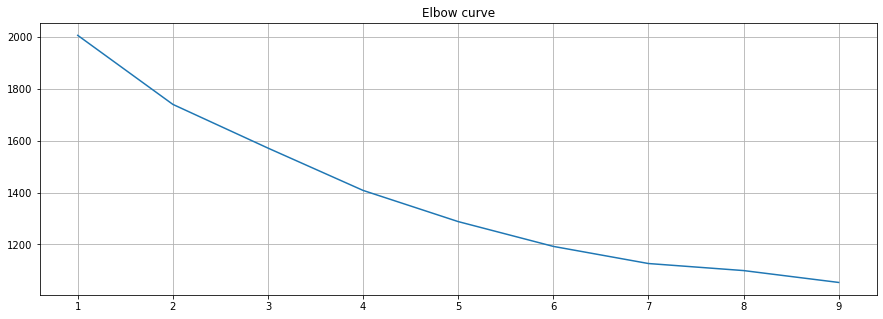

In [44]:
X = df_dummies1.copy() # copy the normalized_df and save it to a variable named X

distorsions = [] # create an empty list named distorsions

for k in range(1, 10): # we will fit multple k-means (from k = 1 to k = 9)
    kmeans = KMeans(n_clusters=k) # creates a k-means instance
    kmeans.fit(X) # fits k-means
    distorsions.append(kmeans.inertia_) # saves the distorsions：SSE,找到尽量小的distorsions
    #同时找到尽量小的k

fig = plt.figure(figsize=(15, 5)) # create a figure space with a given figure size

plt.plot(range(1, 10), distorsions) #  # plot the distorsions

plt.grid(True) # inserts grids 

plt.title('Elbow curve')

In [45]:
model = KMeans(n_clusters = 6) # appears that 3 is the optimal number of classes

model.fit(df_dummies1) # fits the model

labels = model.labels_

In [46]:
df_dummies1['optimum_clusters'] = labels+1 # for easy interpretation, adding 1 to class labels
df_dummies1['optimum_clusters'].value_counts()

5    66
2    54
4    25
1    19
3    10
6     1
Name: optimum_clusters, dtype: int64

In [47]:
df_dummies1.optimum_clusters

0      5
1      5
2      5
3      5
4      1
      ..
170    5
171    5
172    5
173    1
174    5
Name: optimum_clusters, Length: 175, dtype: int32

In [49]:
df_dummies1[df_dummies1["optimum_clusters"]==6]

,FTE Headcount,Amount,Total Contract Value (TCV),Term Length,Age,Account Owner_Gerry Meyle,Account Owner_Jamie Snow,Account Owner_Jim Gandolfo,Account Owner_Kailie Starr,Account Owner_Kevin Crossland,...,Fiscal Period_Q4-2019,Fiscal Period_Q4-2020,Fiscal Period_Q4-2021,Type_Client Expansion,Type_Client Renewal,Type_Existing Business,Type_New Logo - Existing,Type_New Logo - New,Type_One Time Fee (OTF),optimum_clusters
13,-0.922305,-0.698424,-0.631283,13.187001,-0.296672,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6


In [50]:
df_dummies1=df_dummies1.drop(13)

In [51]:
df_dummies1

,FTE Headcount,Amount,Total Contract Value (TCV),Term Length,Age,Account Owner_Gerry Meyle,Account Owner_Jamie Snow,Account Owner_Jim Gandolfo,Account Owner_Kailie Starr,Account Owner_Kevin Crossland,...,Fiscal Period_Q4-2019,Fiscal Period_Q4-2020,Fiscal Period_Q4-2021,Type_Client Expansion,Type_Client Renewal,Type_Existing Business,Type_New Logo - Existing,Type_New Logo - New,Type_One Time Fee (OTF),optimum_clusters
0,-0.464573,-0.000259,-0.007820,-0.003110,-0.008231,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0.000000,-0.388832,-0.521826,-0.086298,-0.509863,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5
2,0.000000,-0.388832,-0.302913,-0.054404,-0.592771,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5
3,-0.922305,-0.010441,-0.266427,-0.086298,-0.717132,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
4,-0.922305,0.677542,0.645712,-0.086298,1.929990,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,-0.607916,1.021534,-0.023190,-0.086298,-0.545395,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
171,-0.607916,1.021534,-0.023190,-0.086298,-0.296672,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,5
172,-0.607916,-0.096439,2.439586,-0.054404,-0.213765,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,5
173,-0.922897,0.230353,0.536255,-0.054404,2.054351,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


Text(0.5, 1.0, 'Elbow curve')

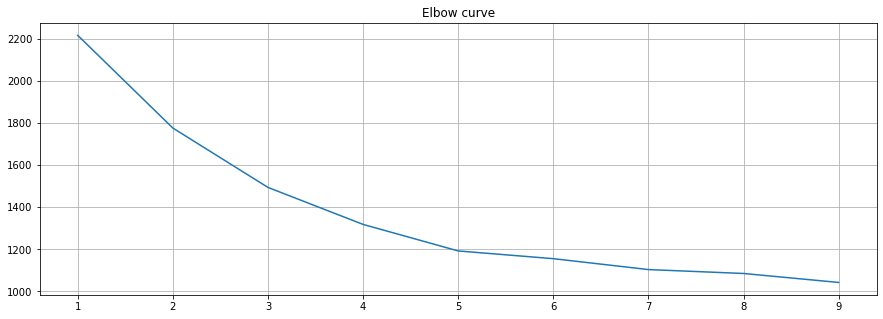

In [52]:
#删除只有一个element的cluster后，重新cluster
X = df_dummies1.copy() # copy the normalized_df and save it to a variable named X

distorsions = [] # create an empty list named distorsions

for k in range(1, 10): # we will fit multple k-means (from k = 1 to k = 9)
    kmeans = KMeans(n_clusters=k) # creates a k-means instance
    kmeans.fit(X) # fits k-means
    distorsions.append(kmeans.inertia_) # saves the distorsions：SSE,找到尽量小的distorsions
    #同时找到尽量小的k

fig = plt.figure(figsize=(15, 5)) # create a figure space with a given figure size

plt.plot(range(1, 10), distorsions) #  # plot the distorsions

plt.grid(True) # inserts grids 

plt.title('Elbow curve')

In [53]:
model = KMeans(n_clusters = 5) # appears that 3 is the optimal number of classes

model.fit(df_dummies1) # fits the model

labels = model.labels_

In [54]:
df_dummies1['optimum_clusters'] = labels+1 # for easy interpretation, adding 1 to class labels
df_dummies1['optimum_clusters'].value_counts()

5    66
1    54
4    25
3    19
2    10
Name: optimum_clusters, dtype: int64

In [55]:
cluster_inf=df_dummies1.groupby('optimum_clusters').mean().T

In [57]:
df_dummies1

,FTE Headcount,Amount,Total Contract Value (TCV),Term Length,Age,Account Owner_Gerry Meyle,Account Owner_Jamie Snow,Account Owner_Jim Gandolfo,Account Owner_Kailie Starr,Account Owner_Kevin Crossland,...,Fiscal Period_Q4-2019,Fiscal Period_Q4-2020,Fiscal Period_Q4-2021,Type_Client Expansion,Type_Client Renewal,Type_Existing Business,Type_New Logo - Existing,Type_New Logo - New,Type_One Time Fee (OTF),optimum_clusters
0,-0.464573,-0.000259,-0.007820,-0.003110,-0.008231,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0.000000,-0.388832,-0.521826,-0.086298,-0.509863,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5
2,0.000000,-0.388832,-0.302913,-0.054404,-0.592771,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5
3,-0.922305,-0.010441,-0.266427,-0.086298,-0.717132,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
4,-0.922305,0.677542,0.645712,-0.086298,1.929990,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,-0.607916,1.021534,-0.023190,-0.086298,-0.545395,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
171,-0.607916,1.021534,-0.023190,-0.086298,-0.296672,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,5
172,-0.607916,-0.096439,2.439586,-0.054404,-0.213765,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,5
173,-0.922897,0.230353,0.536255,-0.054404,2.054351,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3


In [58]:
df_dummies1_original = pd.get_dummies(df4, columns=['Account Owner',
                                         'Account Size','Account Type','Billing State/Province','Sales Territory','Account Status',
                                        'Opportunity Owner','Lead Source','License Type','Billing Model',
                                         'Stage','Fiscal Period','Type'])

In [62]:
df_dummies1_original
df_dummies1_original=df_dummies1_original.drop(df_dummies1_original.index[175:181])

In [63]:
df_dummies1_original

,Account Name,FTE Headcount,Last Activity,Opportunity Name,Amount,Total Contract Value (TCV),Close Date,Term Length,Age,Created Date,...,Fiscal Period_Q3-2021,Fiscal Period_Q4-2019,Fiscal Period_Q4-2020,Fiscal Period_Q4-2021,Type_Client Expansion,Type_Client Renewal,Type_Existing Business,Type_New Logo - Existing,Type_New Logo - New,Type_One Time Fee (OTF)
0,Villanova University,6819.000000,2007/1/21,NaN,10147.99477,25631.902622,NaN,74.597701,133.706897,NaN,...,0,0,0,0,0,0,0,0,0,0
1,Harvard Graduate School of Education,12318.992188,2005/6/21,"Havard GSE - 2020/2021 ""POC"" License - HPL Course",4500.00000,4500.000000,3/19/2020,12.000000,49.000000,1/30/2020,...,0,0,0,0,1,0,0,0,0,0
2,Harvard Graduate School of Education,12318.992188,2005/6/21,Harvard GSE - Professional Education - Custom ...,4500.00000,13500.000000,4/30/2020,36.000000,35.000000,3/26/2020,...,0,0,0,0,1,0,0,0,0,0
3,Online Education Services,1400.000000,2007/1/21,OES - Swinbourne Online - Micro Units Project,10000.00000,15000.000000,2/19/2019,12.000000,14.000000,2/5/2019,...,0,0,0,0,0,0,0,0,1,0
4,Online Education Services,1400.000000,2007/1/21,Online Educational Services - Informal Learnin...,20000.00000,52500.000000,1/6/2019,12.000000,461.000000,10/3/2017,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Missouri Southern State University,5122.000000,2007/1/21,MSSU-FTE-Freemium - 2020 Licence w/ Opt Out,25000.00000,25000.000000,6/30/2020,12.000000,43.000000,5/18/2020,...,0,0,0,0,0,0,0,0,1,0
171,Missouri Southern State University,5122.000000,2007/1/21,MSSU - 2021 Early Renewal,25000.00000,25000.000000,10/14/2020,12.000000,85.000000,7/21/2020,...,0,0,1,0,0,1,0,0,0,0
172,Missouri Southern State University,5122.000000,2007/1/21,MSSU - 2021 Early Renewal + 3-Year Expansion,8750.00000,126250.000000,10/14/2020,36.000000,99.000000,7/7/2020,...,0,0,1,0,1,0,0,0,0,0
173,Lubbock Christian University,1393.000000,2005/4/21,Lubbock Christian University - 2019 Renewal,13500.00000,48000.000000,3/27/2019,36.000000,482.000000,11/30/2017,...,0,0,0,0,0,1,0,0,0,0


In [71]:
df_dummies1_original['cluster']=df_dummies1['optimum_clusters']

In [ ]:
#比较T值

In [72]:
df_dummies1_original

,Account Name,FTE Headcount,Last Activity,Opportunity Name,Amount,Total Contract Value (TCV),Close Date,Term Length,Age,Created Date,...,Fiscal Period_Q4-2019,Fiscal Period_Q4-2020,Fiscal Period_Q4-2021,Type_Client Expansion,Type_Client Renewal,Type_Existing Business,Type_New Logo - Existing,Type_New Logo - New,Type_One Time Fee (OTF),cluster
0,Villanova University,6819.000000,2007/1/21,NaN,10147.99477,25631.902622,NaN,74.597701,133.706897,NaN,...,0,0,0,0,0,0,0,0,0,5.0
1,Harvard Graduate School of Education,12318.992188,2005/6/21,"Havard GSE - 2020/2021 ""POC"" License - HPL Course",4500.00000,4500.000000,3/19/2020,12.000000,49.000000,1/30/2020,...,0,0,0,1,0,0,0,0,0,5.0
2,Harvard Graduate School of Education,12318.992188,2005/6/21,Harvard GSE - Professional Education - Custom ...,4500.00000,13500.000000,4/30/2020,36.000000,35.000000,3/26/2020,...,0,0,0,1,0,0,0,0,0,5.0
3,Online Education Services,1400.000000,2007/1/21,OES - Swinbourne Online - Micro Units Project,10000.00000,15000.000000,2/19/2019,12.000000,14.000000,2/5/2019,...,0,0,0,0,0,0,0,1,0,5.0
4,Online Education Services,1400.000000,2007/1/21,Online Educational Services - Informal Learnin...,20000.00000,52500.000000,1/6/2019,12.000000,461.000000,10/3/2017,...,0,0,0,0,0,0,0,1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Missouri Southern State University,5122.000000,2007/1/21,MSSU-FTE-Freemium - 2020 Licence w/ Opt Out,25000.00000,25000.000000,6/30/2020,12.000000,43.000000,5/18/2020,...,0,0,0,0,0,0,0,1,0,5.0
171,Missouri Southern State University,5122.000000,2007/1/21,MSSU - 2021 Early Renewal,25000.00000,25000.000000,10/14/2020,12.000000,85.000000,7/21/2020,...,0,1,0,0,1,0,0,0,0,5.0
172,Missouri Southern State University,5122.000000,2007/1/21,MSSU - 2021 Early Renewal + 3-Year Expansion,8750.00000,126250.000000,10/14/2020,36.000000,99.000000,7/7/2020,...,0,1,0,1,0,0,0,0,0,5.0
173,Lubbock Christian University,1393.000000,2005/4/21,Lubbock Christian University - 2019 Renewal,13500.00000,48000.000000,3/27/2019,36.000000,482.000000,11/30/2017,...,0,0,0,0,1,0,0,0,0,3.0


In [66]:
from scipy import stats

In [ ]:
#stats.ttest_ind(rvs1, rvs5, equal_var = False)

In [74]:
cluster_1=df_dummies1_original[df_dummies1_original["cluster"]==1.0]

In [76]:
cluster_2=df_dummies1_original[df_dummies1_original["cluster"]==2.0]

In [78]:
cluster_3=df_dummies1_original[df_dummies1_original["cluster"]==3.0]

In [77]:
cluster_4=df_dummies1_original[df_dummies1_original["cluster"]==4.0]

In [79]:
cluster_5=df_dummies1_original[df_dummies1_original["cluster"]==5.0]

In [86]:
df_dummies1_original['ratio1']=df_dummies1_original.Amount/df_dummies1_original['Total Contract Value (TCV)']

In [88]:
df_dummies1_original['ratio2']=df_dummies1_original['Total Contract Value (TCV)']/df_dummies1_original['FTE Headcount']

In [87]:
df_dummies1_original['ratio1']

0      0.395913
1      1.000000
2      0.333333
3      0.666667
4      0.380952
         ...   
170    1.000000
171    1.000000
172    0.069307
173    0.281250
174    0.052083
Name: ratio1, Length: 175, dtype: float64

In [91]:
stats.ttest_ind(cluster_1.Amount, cluster_2.Amount, equal_var = False)

Ttest_indResult(statistic=-5.667840282338404, pvalue=0.00030374093617591765)

In [90]:
stats.ttest_ind(cluster_1.Amount, cluster_3.Amount, equal_var = False)

Ttest_indResult(statistic=-7.537421461433238, pvalue=4.634090312022443e-07)

In [89]:
stats.ttest_ind(cluster_1.Amount, cluster_4.Amount, equal_var = False)

Ttest_indResult(statistic=-2.857838641759833, pvalue=0.008113562492009525)

In [92]:
df_dummies1_original.groupby('cluster').mean().T

cluster,1.0,2.0,3.0,4.0,5.0
FTE Headcount,6514.738426,22906.899219,8264.944490,34596.400000,8357.800308
Amount,1236.343422,49880.000000,19528.894737,4830.687791,10896.658543
Total Contract Value (TCV),6124.843078,137825.000000,47333.947368,10976.014105,25138.009784
Term Length,8.714772,26.600000,32.210526,13.503908,26.939220
Age,74.031609,194.300000,517.684211,102.188276,79.174765
...,...,...,...,...,...
Type_New Logo - New,0.666667,0.100000,0.052632,0.640000,0.287879
Type_One Time Fee (OTF),0.000000,0.000000,0.000000,0.000000,0.030303
ratio,inf,10.317432,0.639226,0.752087,0.576137
ratio1,inf,10.317432,0.639226,0.752087,0.576137


In [61]:
cluster_inf.to_csv('cluster_dummies1.csv')

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()

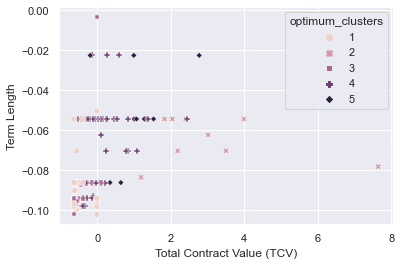

In [64]:
sns.scatterplot(x="Total Contract Value (TCV)", y="Term Length",hue="optimum_clusters", style="optimum_clusters", 
                data=df_dummies1)
plt.show()

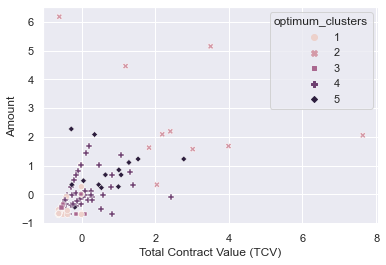

In [65]:
sns.scatterplot(x="Total Contract Value (TCV)", y="Amount",hue="optimum_clusters", style="optimum_clusters", 
                data=df_dummies1)
plt.show()

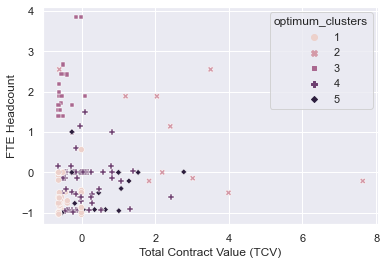

In [66]:
sns.scatterplot(x="Total Contract Value (TCV)", y="FTE Headcount",hue="optimum_clusters", style="optimum_clusters", 
                data=df_dummies1)
plt.show()

In [80]:
df_dummies1.to_csv('df_dummies1.csv')

In [84]:
cluster_3=df_dummies1.loc[df_dummies1['optimum_clusters']==3]

In [85]:
cluster_3

,FTE Headcount,Amount,Total Contract Value (TCV),Term Length,Age,Account Owner_Gerry Meyle,Account Owner_Jamie Snow,Account Owner_Jim Gandolfo,Account Owner_Kailie Starr,Account Owner_Kevin Crossland,...,Fiscal Period_Q4-2019,Fiscal Period_Q4-2020,Fiscal Period_Q4-2021,Type_Client Expansion,Type_Client Renewal,Type_Existing Business,Type_New Logo - Existing,Type_New Logo - New,Type_One Time Fee (OTF),optimum_clusters
42,0.984560,0.333551,-0.266427,-0.086298,-0.190077,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,3
49,1.668497,0.333551,-0.266427,-0.086298,0.680453,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
76,2.439521,-0.148038,-0.436693,-0.087627,-0.634225,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
77,2.439521,-0.457630,-0.546150,-0.086298,-0.800040,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
100,1.721459,-0.492029,-0.558312,-0.086298,-0.480253,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
101,2.000287,-0.664197,-0.619182,-0.096929,-0.782274,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,3
123,1.400058,-0.512669,-0.565609,-0.086298,-0.515785,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,3
124,1.400058,-0.698424,-0.631283,-0.094272,0.378433,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,3
125,1.400058,-0.375375,-0.517069,-0.095600,-0.492097,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,3
137,2.676031,-0.354432,-0.509665,-0.094272,1.154211,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,3


In [102]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [103]:
model = LinearRegression()

In [94]:
cluster_3_reg1=cluster_3[['Total Contract Value (TCV)']]
cluster_3_reg2=cluster_3[['FTE Headcount']]
cluster_3_reg1=np.array(cluster_3_reg1)
cluster_3_reg2=np.array(cluster_3_reg2)

In [95]:
model.fit(cluster_3_reg1,cluster_3_reg2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
model = LinearRegression().fit(cluster_3_reg1,cluster_3_reg2)

In [97]:
r_sq = model.score(cluster_3_reg1,cluster_3_reg2)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.21766490684145134


In [98]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: [2.76437627]
slope: [[1.57224167]]


In [118]:
df_dummies2.columns.values.tolist()

['Account Name',
 'FTE Headcount_x',
 'Opportunity Name',
 'Amount',
 'Expected Revenue',
 'Total Contract Value (TCV)',
 'Probability (%)',
 'Term Length',
 'Close Date',
 'Age',
 'Account Owner',
 'FTE Headcount_y',
 'Last Activity',
 'Opportunity Owner_Gerry Meyle',
 'Opportunity Owner_Jamie Snow',
 'Opportunity Owner_Jim Gandolfo',
 'Opportunity Owner_Kailie Starr',
 'Opportunity Owner_Ryan Nemetz',
 'Opportunity Owner_Tyler Rohrbaugh',
 'Lead Source_Client-Current',
 'Lead Source_Conference',
 'Lead Source_Inbound-Trial Offer',
 'Lead Source_Inbound-Website',
 'Lead Source_Outbound-Self Prospected',
 'Lead Source_Referral-Current Client',
 'License Type_Courseware - Bookstore',
 'License Type_Courseware - Department',
 'License Type_Courseware - Student Pay',
 'License Type_Legacy - Active User',
 'License Type_Legacy - FTE',
 'Billing Model_Annual Billing',
 'Billing Model_Semesterly Billing',
 'Billing State/Province_AL',
 'Billing State/Province_AZ',
 'Billing State/Province_Ar

In [119]:
df_dummies2=df_dummies2.drop(columns=['Account Name','Opportunity Name'])

In [120]:
df_dummies2=df_dummies2.drop(columns=['Close Date','Last Activity'])

In [121]:
df_dummies2=df_dummies2.drop(columns=['Account Owner'])

Text(0.5, 1.0, 'Elbow curve')

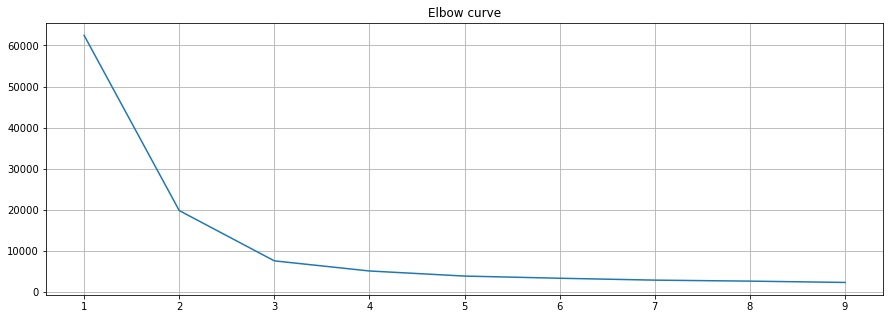

In [122]:
X = df_dummies2.copy() # copy the normalized_df and save it to a variable named X

distorsions = [] # create an empty list named distorsions

for k in range(1, 10): # we will fit multple k-means (from k = 1 to k = 9)
    kmeans = KMeans(n_clusters=k) # creates a k-means instance
    kmeans.fit(X) # fits k-means
    distorsions.append(kmeans.inertia_) # saves the distorsions：SSE,找到尽量小的distorsions
    #同时找到尽量小的k

fig = plt.figure(figsize=(15, 5)) # create a figure space with a given figure size

plt.plot(range(1, 10), distorsions) #  # plot the distorsions

plt.grid(True) # inserts grids 

plt.title('Elbow curve')

In [123]:
model = KMeans(n_clusters = 3) # appears that 3 is the optimal number of classes

model.fit(df_dummies2) # fits the model

labels = model.labels_

In [124]:
df_dummies2['optimum_clusters'] = labels+1 # for easy interpretation, adding 1 to class labels
df_dummies2['optimum_clusters'].value_counts()

1    66
3    35
2    23
Name: optimum_clusters, dtype: int64

In [125]:
cluster_inf2=df_dummies2.groupby('optimum_clusters').mean().T
cluster_inf2

optimum_clusters,1,2,3
FTE Headcount_x,0.068107,0.184597,-0.249736
Amount,0.070194,-0.272812,0.046911
Expected Revenue,0.111791,-0.025434,-0.194091
Total Contract Value (TCV),0.008063,-0.111083,0.057792
Probability (%),44.621212,83.260870,20.571429
...,...,...,...
Fiscal Period_Q4-2022,0.075758,0.000000,0.114286
Fiscal Period_Q4-2023,0.000000,0.000000,0.057143
Account Size_ENT,0.257576,0.347826,0.171429
Account Size_MM,0.333333,0.173913,0.314286


In [126]:
df_dummies2_ = pd.get_dummies(df5, columns=['Opportunity Owner','Lead Source','License Type','Billing Model','Billing State/Province',
                                         'Stage','Type','Account Type','Sales Territory','Account Status','Fiscal Period','Account Size'])


In [131]:
df_dummies2

,FTE Headcount_x,Amount,Expected Revenue,Total Contract Value (TCV),Probability (%),Term Length,Age,FTE Headcount_y,Opportunity Owner_Gerry Meyle,Opportunity Owner_Jamie Snow,...,Fiscal Period_Q3-2022,Fiscal Period_Q3-2023,Fiscal Period_Q3-2024,Fiscal Period_Q4-2021,Fiscal Period_Q4-2022,Fiscal Period_Q4-2023,Account Size_ENT,Account Size_MM,Account Size_SMB,optimum_clusters
0,-1.448226e-16,-3.271741e-01,-3.000118e-01,-0.460369,40.0,12.000000,9.379157e-01,0.000000,0,0,...,0,0,0,0,0,0,0,0,1,1
1,-1.448226e-16,-3.435705e-01,-3.868030e-01,-0.476522,20.0,12.000000,1.107812e+00,0.000000,0,0,...,0,0,0,0,0,0,0,1,0,3
2,-1.448226e-16,-3.435705e-01,-3.157921e-01,-0.476522,40.0,12.000000,9.048804e-01,0.000000,0,0,...,0,0,0,0,0,0,0,1,0,1
3,-1.107840e+00,-3.583273e-01,-3.299942e-01,-0.491059,40.0,12.000000,9.898285e-01,-1.018535,0,0,...,0,0,0,0,0,0,0,0,1,1
4,2.238387e+00,-3.271741e-01,-1.619351e-01,-0.460369,75.0,12.000000,-8.601529e-01,2.180681,0,0,...,0,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-1.448226e-16,5.964989e-17,1.435201e-16,0.000000,45.0,9.315315,1.341317e-16,-0.523760,0,0,...,0,0,0,0,0,0,0,0,0,1
120,-1.448226e-16,5.964989e-17,1.435201e-16,0.000000,45.0,9.315315,1.341317e-16,-1.018535,0,0,...,0,0,0,0,0,0,0,0,0,1
121,-1.448226e-16,5.964989e-17,1.435201e-16,0.000000,45.0,9.315315,1.341317e-16,-0.569431,0,0,...,0,0,0,0,0,0,1,0,0,1
122,-1.448226e-16,5.964989e-17,1.435201e-16,0.000000,45.0,9.315315,1.341317e-16,1.591975,0,0,...,0,0,0,0,0,0,1,0,0,1


In [132]:
df_dummies2_['optimum_clusters']=df_dummies2['optimum_clusters']

In [133]:
df_dummies2_

,Account Name,FTE Headcount_x,Opportunity Name,Amount,Expected Revenue,Total Contract Value (TCV),Probability (%),Term Length,Close Date,Age,...,Fiscal Period_Q3-2022,Fiscal Period_Q3-2023,Fiscal Period_Q3-2024,Fiscal Period_Q4-2021,Fiscal Period_Q4-2022,Fiscal Period_Q4-2023,Account Size_ENT,Account Size_MM,Account Size_SMB,optimum_clusters
0,Green Flower Media,14414.6,Green Flower - 2023 Renewal,5000.000000,2000.000000,5000.000000,40.0,12.000000,4/22/2021,434.000000,...,0,0,0,0,0,0,0,0,1,1
1,Harvard Graduate School of Education,14414.6,Harvard GSE HPL Course - 2021 Renewal,4500.000000,900.000000,4500.000000,20.0,12.000000,5/31/2021,470.000000,...,0,0,0,0,0,0,0,1,0,3
2,Harvard Graduate School of Education,14414.6,Harvard GSE - PPE - 2023 Renewal,4500.000000,1800.000000,4500.000000,40.0,12.000000,4/29/2023,427.000000,...,0,0,0,0,0,0,0,1,0,1
3,Midwest College of Oriental Medicine,500.0,Midwest College of Oriental Medicine - 2021 Re...,4050.000000,1620.000000,4050.000000,40.0,12.000000,5/31/2021,445.000000,...,0,0,0,0,0,0,0,0,1,1
4,Arizona State University,42529.0,ASU - Annual SSO Integration Fee,5000.000000,3750.000000,5000.000000,75.0,12.000000,7/31/2021,53.000000,...,0,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Western New England University College of Busi...,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,0,0,0,1
120,Drexel - Master's in Television and Media Program,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,0,0,0,1
121,University of South Carolina - Darla Moore Sch...,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,1,0,0,1
122,University of South Carolina - Columbia,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,1,0,0,1


In [135]:
cluster_inf2=df_dummies2_.groupby('optimum_clusters').mean().T
cluster_inf2

optimum_clusters,1,2,3
FTE Headcount_x,15270.027273,16733.156522,11277.885714
Amount,17117.515751,6657.739130,16407.498000
Expected Revenue,7219.227583,5480.024783,3342.452000
Total Contract Value (TCV),19500.406047,15812.233855,21039.789943
Probability (%),44.621212,83.260870,20.571429
...,...,...,...
Fiscal Period_Q4-2022,0.075758,0.000000,0.114286
Fiscal Period_Q4-2023,0.000000,0.000000,0.057143
Account Size_ENT,0.257576,0.347826,0.171429
Account Size_MM,0.333333,0.173913,0.314286


In [76]:
cluster_inf2.to_csv('cluster_dummies2.csv')

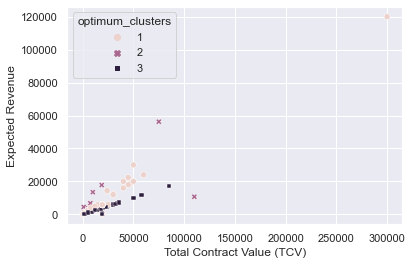

In [176]:
sns.scatterplot(x="Total Contract Value (TCV)", y="Expected Revenue",hue="optimum_clusters", style="optimum_clusters", 
                data=df_dummies2_)
plt.show()

In [177]:
df_dummies2['optimum_clusters'].value_counts()

1    66
3    35
2    23
Name: optimum_clusters, dtype: int64

In [143]:
cluster_1=df_dummies2_.loc[df_dummies2_['optimum_clusters']==1]
cluster_1

,Account Name,FTE Headcount_x,Opportunity Name,Amount,Expected Revenue,Total Contract Value (TCV),Probability (%),Term Length,Close Date,Age,...,Fiscal Period_Q3-2022,Fiscal Period_Q3-2023,Fiscal Period_Q3-2024,Fiscal Period_Q4-2021,Fiscal Period_Q4-2022,Fiscal Period_Q4-2023,Account Size_ENT,Account Size_MM,Account Size_SMB,optimum_clusters
0,Green Flower Media,14414.6,Green Flower - 2023 Renewal,5000.000000,2000.000000,5000.000000,40.0,12.000000,4/22/2021,434.000000,...,0,0,0,0,0,0,0,0,1,1
2,Harvard Graduate School of Education,14414.6,Harvard GSE - PPE - 2023 Renewal,4500.000000,1800.000000,4500.000000,40.0,12.000000,4/29/2023,427.000000,...,0,0,0,0,0,0,0,1,0,1
3,Midwest College of Oriental Medicine,500.0,Midwest College of Oriental Medicine - 2021 Re...,4050.000000,1620.000000,4050.000000,40.0,12.000000,5/31/2021,445.000000,...,0,0,0,0,0,0,0,0,1,1
6,Barnard College,2557.0,Barnard College - Fall 2021 Expansion (Coursew...,995.000000,398.000000,1000.000000,40.0,6.000000,8/27/2021,197.000000,...,0,0,0,0,0,0,0,0,1,1
9,Columbia Business School,14414.6,Columbia Business School - Summer Term 2021 Co...,3074.550000,1537.280000,3074.550000,50.0,4.000000,7/30/2021,98.000000,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Western New England University College of Busi...,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,0,0,0,1
120,Drexel - Master's in Television and Media Program,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,0,0,0,1
121,University of South Carolina - Darla Moore Sch...,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,1,0,0,1
122,University of South Carolina - Columbia,14414.6,NaN,14976.987658,5802.382342,19250.813111,45.0,9.315315,NaN,235.261261,...,0,0,0,0,0,0,1,0,0,1


In [178]:
model = LinearRegression()

In [179]:
cluster_1_reg1=cluster_1[['Total Contract Value (TCV)']]
cluster_1_reg2=cluster_1[['Expected Revenue']]
cluster_1_reg1=np.array(cluster_1_reg1)
cluster_1_reg2=np.array(cluster_1_reg2)

In [180]:
model.fit(cluster_1_reg1,cluster_1_reg2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
model = LinearRegression().fit(cluster_1_reg1,cluster_1_reg2)

In [182]:
r_sq = model.score(cluster_1_reg1,cluster_1_reg2)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9714919774369476


In [183]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: [-677.61901041]
slope: [[0.40495806]]


In [184]:
cluster_2=df_dummies2_.loc[df_dummies2_['optimum_clusters']==2]

In [185]:
model = LinearRegression()

In [186]:
cluster_2_reg1=cluster_2[['Total Contract Value (TCV)']]
cluster_2_reg2=cluster_2[['Expected Revenue']]
cluster_2_reg1=np.array(cluster_2_reg1)
cluster_2_reg2=np.array(cluster_2_reg2)

In [187]:
model.fit(cluster_2_reg1,cluster_2_reg2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [188]:
model = LinearRegression().fit(cluster_2_reg1,cluster_2_reg2)

In [189]:
r_sq = model.score(cluster_2_reg1,cluster_2_reg2)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.3465984726797714


In [190]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: [1170.3967232]
slope: [[0.27255024]]


In [191]:
cluster_3=df_dummies2_.loc[df_dummies2_['optimum_clusters']==3]

In [192]:
model = LinearRegression()

In [193]:
cluster_3_reg1=cluster_3[['Total Contract Value (TCV)']]
cluster_3_reg2=cluster_3[['Expected Revenue']]
cluster_3_reg1=np.array(cluster_3_reg1)
cluster_3_reg2=np.array(cluster_3_reg2)

In [194]:
model.fit(cluster_3_reg1,cluster_3_reg2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:
model = LinearRegression().fit(cluster_3_reg1,cluster_3_reg2)

In [196]:
r_sq = model.score(cluster_3_reg1,cluster_3_reg2)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8062742758268621


In [197]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: [-958.82653608]
slope: [[0.20443543]]


In [47]:
#Decision Tree for total pipeline report

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [32]:
#df_dummies1

In [33]:
feature_cols1=['FTE Headcount',
 'Amount',
 'Term Length',
 'Age',
 'Account Owner_Gerry Meyle',
 'Account Owner_Jamie Snow',
 'Account Owner_Jim Gandolfo',
 'Account Owner_Kailie Starr',
 'Account Owner_Kevin Crossland',
 'Account Owner_Ryan Nemetz',
 'Account Owner_Tyler Rohrbaugh',
 'Account Size_ENT',
 'Account Size_MM',
 'Account Size_SMB',
 'Account Type_Biz/Dev Partner',
 'Account Type_Corporate',
 'Account Type_Higher Ed',
 'Account Type_K-12',
 'Account Type_Other',
 'Billing State/Province_AL',
 'Billing State/Province_AZ',
 'Billing State/Province_Arizona',
 'Billing State/Province_CA',
 'Billing State/Province_CO',
 'Billing State/Province_DC',
 'Billing State/Province_DE',
 'Billing State/Province_FL',
 'Billing State/Province_GA',
 'Billing State/Province_IL',
 'Billing State/Province_IN',
 'Billing State/Province_KS',
 'Billing State/Province_MA',
 'Billing State/Province_MD',
 'Billing State/Province_MI',
 'Billing State/Province_MN',
 'Billing State/Province_MO',
 'Billing State/Province_Massachusetts',
 'Billing State/Province_NE',
 'Billing State/Province_NY',
 'Billing State/Province_OK',
 'Billing State/Province_PA',
 'Billing State/Province_Pennsylvania',
 'Billing State/Province_SC',
 'Billing State/Province_SP',
 'Billing State/Province_TX',
 'Billing State/Province_UT',
 'Billing State/Province_Vermont',
 'Billing State/Province_WA',
 'Sales Territory_International',
 'Sales Territory_Mid Atlantic',
 'Sales Territory_Mid-West',
 'Sales Territory_Mountain West + Mid-South',
 'Sales Territory_Northeast',
 'Sales Territory_South',
 'Sales Territory_South East',
 'Sales Territory_West',
 'Account Status_Publisher Client',
 'Account Status_Subscribed Client',
 'Opportunity Owner_Bob Ertischek',
 'Opportunity Owner_Gerry Meyle',
 'Opportunity Owner_Jim Gandolfo',
 'Opportunity Owner_Kailie Starr',
 'Opportunity Owner_Randy Sealy',
 'Opportunity Owner_Ryan Nemetz',
 'Opportunity Owner_Steve Davis',
 'Opportunity Owner_Tyler Rohrbaugh',
 'Lead Source_Client-Current',
 'Lead Source_Conference',
 'Lead Source_Inbound-Email',
 'Lead Source_Inbound-Trial Offer',
 'Lead Source_Inbound-Website',
 'Lead Source_Outbound-Self Prospected',
 'Lead Source_Previously Free',
 'Lead Source_Referral-Current Client',
 'Lead Source_Referral-Investor/Advisor',
 'Lead Source_Referral-Other',
 'License Type_Courseware - Bookstore',
 'License Type_Courseware - Department',
 'License Type_Courseware - Student Pay',
 'License Type_Legacy - Active User',
 'License Type_One Time Fee (OTF)',
 'Billing Model_Annual Billing',
 'Billing Model_Semesterly Billing',
 'Stage_Closed Won',
 'Fiscal Period_Q1-2019',
 'Fiscal Period_Q1-2020',
 'Fiscal Period_Q1-2021',
 'Fiscal Period_Q2-2019',
 'Fiscal Period_Q2-2020',
 'Fiscal Period_Q2-2021',
 'Fiscal Period_Q3-2019',
 'Fiscal Period_Q3-2020',
 'Fiscal Period_Q3-2021',
 'Fiscal Period_Q4-2019',
 'Fiscal Period_Q4-2020',
 'Fiscal Period_Q4-2021',
 'Type_Client Expansion',
 'Type_Client Renewal',
 'Type_Existing Business',
 'Type_New Logo - Existing',
 'Type_New Logo - New',
 'Type_One Time Fee (OTF)']

In [34]:
df_dummies1.columns.values.tolist()

['Account Name',
 'FTE Headcount',
 'Last Activity',
 'Opportunity Name',
 'Amount',
 'Total Contract Value (TCV)',
 'Close Date',
 'Term Length',
 'Age',
 'Created Date',
 'Account Owner_Gerry Meyle',
 'Account Owner_Jamie Snow',
 'Account Owner_Jim Gandolfo',
 'Account Owner_Kailie Starr',
 'Account Owner_Kevin Crossland',
 'Account Owner_Ryan Nemetz',
 'Account Owner_Tyler Rohrbaugh',
 'Account Size_ENT',
 'Account Size_MM',
 'Account Size_SMB',
 'Account Type_Biz/Dev Partner',
 'Account Type_Corporate',
 'Account Type_Higher Ed',
 'Account Type_K-12',
 'Account Type_Other',
 'Billing State/Province_AL',
 'Billing State/Province_AZ',
 'Billing State/Province_Arizona',
 'Billing State/Province_CA',
 'Billing State/Province_CO',
 'Billing State/Province_DC',
 'Billing State/Province_DE',
 'Billing State/Province_FL',
 'Billing State/Province_GA',
 'Billing State/Province_IL',
 'Billing State/Province_IN',
 'Billing State/Province_KS',
 'Billing State/Province_MA',
 'Billing State/Prov

In [35]:
X = df_dummies1[feature_cols1]
X

,FTE Headcount,Amount,Term Length,Age,Account Owner_Gerry Meyle,Account Owner_Jamie Snow,Account Owner_Jim Gandolfo,Account Owner_Kailie Starr,Account Owner_Kevin Crossland,Account Owner_Ryan Nemetz,...,Fiscal Period_Q3-2021,Fiscal Period_Q4-2019,Fiscal Period_Q4-2020,Fiscal Period_Q4-2021,Type_Client Expansion,Type_Client Renewal,Type_Existing Business,Type_New Logo - Existing,Type_New Logo - New,Type_One Time Fee (OTF)
0,-0.464573,-0.000259,-0.003110,-0.008231,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,-0.388832,-0.086298,-0.509863,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.000000,-0.388832,-0.054404,-0.592771,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.922305,-0.010441,-0.086298,-0.717132,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.922305,0.677542,-0.086298,1.929990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,-0.607916,1.021534,-0.086298,-0.545395,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
171,-0.607916,1.021534,-0.086298,-0.296672,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
172,-0.607916,-0.096439,-0.054404,-0.213765,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
173,-0.922897,0.230353,-0.054404,2.054351,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
y=df_dummies1['Band']

In [37]:
y

0      d
1      b
2      b
3      c
4      d
      ..
170    c
171    c
172    d
173    d
174    d
Name: Band, Length: 175, dtype: object

In [38]:
#load necessary packages

import pandas as pd
import numpy as np
#from os import path
#import io
import matplotlib.pyplot as plt
from datetime import timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import math 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Define error measures - we'll use these throughout the notebook
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(abs((y_true - y_pred) / y_true)) * 100

def mae(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(abs(y_true - y_pred))

def rmse(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(np.mean((y_true-y_pred)**2)) 

In [39]:
#Make model decisions - change these to change the model outcome
minimum_samples_to_split = 10
maximum_tree_depth = 5
minimum_samples_per_leaf = 3

#Create model
decision_tree_model = DecisionTreeRegressor(random_state=0, 
                                        min_samples_split = minimum_samples_to_split, 
                                        max_depth = maximum_tree_depth,
                                        min_samples_leaf = minimum_samples_per_leaf)

In [41]:
X = df_dummies1[feature_cols1]
y  =  df_dummies1['Band']
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)


In [43]:

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [44]:
# One-hot encode the training data and show the resulting DataFrame with proper column names
ohe = OneHotEncoder()

ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))

ohe_df.head()

,FTE Headcount_-1.0405606649874415,FTE Headcount_-1.0346479048005304,FTE Headcount_-1.0257787645201635,FTE Headcount_-0.9983266636523611,FTE Headcount_-0.9955392195642457,FTE Headcount_-0.9560926623172806,FTE Headcount_-0.9497575621170186,FTE Headcount_-0.9486594780823064,FTE Headcount_-0.9228967372679074,FTE Headcount_-0.9223054612492163,...,Type_Client Renewal_0,Type_Client Renewal_1,Type_Existing Business_0,Type_Existing Business_1,Type_New Logo - Existing_0,Type_New Logo - Existing_1,Type_New Logo - New_0,Type_New Logo - New_1,Type_One Time Fee (OTF)_0,Type_One Time Fee (OTF)_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
decision_tree_model.fit(X_train,y_train)
plt.figure(figsize=(40,20))
tree.plot_tree(decision_tree_model, filled=True, fontsize = 20, feature_names = feature_cols1)
plt.show()

In [86]:
from sklearn.metrics import accuracy_score
res_pred = decision_tree_model.predict(X_test)
res_pred=np.around(res_pred)
res_pred=pd.Series(res_pred)
res_pred=pd.to_numeric(res_pred)
res_pred

AttributeError: 'DecisionTreeRegressor' object has no attribute 'tree_'

In [87]:
y_test=pd.to_numeric(y_test)
y_test

ValueError: Unable to parse string "a" at position 0

In [88]:
score = accuracy_score(y_test, res_pred)

NameError: name 'res_pred' is not defined

In [89]:
score

NameError: name 'score' is not defined

In [90]:
#df_dummies2 Total Pipeline Report (All Types)
feature_cols=['FTE Headcount_x','Amount','Expected Revenue','Probability (%)','Term Length','Age','FTE Headcount_y','Opportunity Owner_Gerry Meyle',
 'Opportunity Owner_Jamie Snow',
 'Opportunity Owner_Jim Gandolfo',
 'Opportunity Owner_Kailie Starr',
 'Opportunity Owner_Ryan Nemetz',
 'Opportunity Owner_Tyler Rohrbaugh',
 'Lead Source_Client-Current',
 'Lead Source_Conference',
 'Lead Source_Inbound-Trial Offer',
 'Lead Source_Inbound-Website',
 'Lead Source_Outbound-Self Prospected',
 'Lead Source_Referral-Current Client',
 'License Type_Courseware - Bookstore',
 'License Type_Courseware - Department',
 'License Type_Courseware - Student Pay',
 'License Type_Legacy - Active User',
 'License Type_Legacy - FTE',
 'Billing Model_Annual Billing',
 'Billing Model_Semesterly Billing',
 'Billing State/Province_AL',
 'Billing State/Province_AZ',
 'Billing State/Province_Arizona',
 'Billing State/Province_CA',
 'Billing State/Province_CO',
 'Billing State/Province_DC',
 'Billing State/Province_DE',
 'Billing State/Province_FL',
 'Billing State/Province_GA',
 'Billing State/Province_IL',
 'Billing State/Province_IN',
 'Billing State/Province_KS',
 'Billing State/Province_MA',
 'Billing State/Province_MD',
 'Billing State/Province_MI',
 'Billing State/Province_MN',
 'Billing State/Province_MO',
 'Billing State/Province_Massachusetts',
 'Billing State/Province_NE',
 'Billing State/Province_NY',
 'Billing State/Province_OK',
 'Billing State/Province_PA',
 'Billing State/Province_Pennsylvania',
 'Billing State/Province_SC',
 'Billing State/Province_SP',
 'Billing State/Province_TX',
 'Billing State/Province_UT',
 'Billing State/Province_Vermont',
 'Billing State/Province_WA',
 'Stage_Awaiting Budget Approval',
 'Stage_Budget Approval',
 'Stage_Contract Sent',
 'Stage_Evaluation',
 'Stage_Initiate & Educate',
 'Stage_Legal / Redlines',
 'Stage_Verbal Yes',
 'Type_Client Expansion',
 'Type_Client Renewal',
 'Account Type_Biz/Dev Partner',
 'Account Type_Corporate',
 'Account Type_Higher Ed',
 'Account Type_K-12',
 'Account Type_Other',
 'Sales Territory_International',
 'Sales Territory_Mid Atlantic',
 'Sales Territory_Mid-West',
 'Sales Territory_Mountain West + Mid-South',
 'Sales Territory_Northeast',
 'Sales Territory_South',
 'Sales Territory_South East',
 'Sales Territory_West',
 'Account Status_Publisher Client',
 'Account Status_Subscribed Client',
             'Fiscal Period_Q1-2022',
 'Fiscal Period_Q1-2023',
 'Fiscal Period_Q2-2021',
 'Fiscal Period_Q2-2022',
 'Fiscal Period_Q2-2023',
 'Fiscal Period_Q2-2024',
 'Fiscal Period_Q3-2021',
 'Fiscal Period_Q3-2022',
 'Fiscal Period_Q3-2023',
 'Fiscal Period_Q3-2024',
 'Fiscal Period_Q4-2021',
 'Fiscal Period_Q4-2022',
 'Fiscal Period_Q4-2023',
 'Account Size_ENT',
 'Account Size_MM',
 'Account Size_SMB']

In [91]:

df_dummies2.columns.values.tolist()

['Account Name',
 'FTE Headcount_x',
 'Opportunity Name',
 'Amount',
 'Expected Revenue',
 'Total Contract Value (TCV)',
 'Probability (%)',
 'Term Length',
 'Close Date',
 'Age',
 'Account Owner',
 'FTE Headcount_y',
 'Last Activity',
 'Opportunity Owner_Gerry Meyle',
 'Opportunity Owner_Jamie Snow',
 'Opportunity Owner_Jim Gandolfo',
 'Opportunity Owner_Kailie Starr',
 'Opportunity Owner_Ryan Nemetz',
 'Opportunity Owner_Tyler Rohrbaugh',
 'Lead Source_Client-Current',
 'Lead Source_Conference',
 'Lead Source_Inbound-Trial Offer',
 'Lead Source_Inbound-Website',
 'Lead Source_Outbound-Self Prospected',
 'Lead Source_Referral-Current Client',
 'License Type_Courseware - Bookstore',
 'License Type_Courseware - Department',
 'License Type_Courseware - Student Pay',
 'License Type_Legacy - Active User',
 'License Type_Legacy - FTE',
 'Billing Model_Annual Billing',
 'Billing Model_Semesterly Billing',
 'Billing State/Province_AL',
 'Billing State/Province_AZ',
 'Billing State/Province_Ar

In [92]:
df_dummies2

,Account Name,FTE Headcount_x,Opportunity Name,Amount,Expected Revenue,Total Contract Value (TCV),Probability (%),Term Length,Close Date,Age,...,Fiscal Period_Q3-2022,Fiscal Period_Q3-2023,Fiscal Period_Q3-2024,Fiscal Period_Q4-2021,Fiscal Period_Q4-2022,Fiscal Period_Q4-2023,Account Size_ENT,Account Size_MM,Account Size_SMB,Band
0,Green Flower Media,-2.554727e-17,Green Flower - 2023 Renewal,-3.271741e-01,-3.000118e-01,-4.603693e-01,40.0,12.000000,2021-04-22,9.379157e-01,...,0,0,0,0,0,0,0,0,1,4
1,Harvard Graduate School of Education,-2.554727e-17,Harvard GSE HPL Course - 2021 Renewal,-3.435705e-01,-3.868030e-01,-4.765217e-01,20.0,12.000000,2021-05-31,1.107812e+00,...,0,0,0,0,0,0,0,1,0,4
2,Harvard Graduate School of Education,-2.554727e-17,Harvard GSE - PPE - 2023 Renewal,-3.435705e-01,-3.157921e-01,-4.765217e-01,40.0,12.000000,2023-04-29,9.048804e-01,...,0,0,0,0,0,0,0,1,0,4
3,Midwest College of Oriental Medicine,-1.107840e+00,Midwest College of Oriental Medicine - 2021 Re...,-3.583273e-01,-3.299942e-01,-4.910588e-01,40.0,12.000000,2021-05-31,9.898285e-01,...,0,0,0,0,0,0,0,0,1,4
4,Arizona State University,2.238387e+00,ASU - Annual SSO Integration Fee,-3.271741e-01,-1.619351e-01,-4.603693e-01,75.0,12.000000,2021-07-31,-8.601529e-01,...,0,0,0,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Western New England University College of Busi...,-2.554727e-17,NaN,-6.738866e-18,-1.152687e-17,-1.217664e-16,45.0,9.315315,NaT,1.520122e-17,...,0,0,0,0,0,0,0,0,0,4
120,Drexel - Master's in Television and Media Program,-2.554727e-17,NaN,-6.738866e-18,-1.152687e-17,-1.217664e-16,45.0,9.315315,NaT,1.520122e-17,...,0,0,0,0,0,0,0,0,0,4
121,University of South Carolina - Darla Moore Sch...,-2.554727e-17,NaN,-6.738866e-18,-1.152687e-17,-1.217664e-16,45.0,9.315315,NaT,1.520122e-17,...,0,0,0,0,0,0,1,0,0,4
122,University of South Carolina - Columbia,-2.554727e-17,NaN,-6.738866e-18,-1.152687e-17,-1.217664e-16,45.0,9.315315,NaT,1.520122e-17,...,0,0,0,0,0,0,1,0,0,4


In [93]:
df_dummies2=df_dummies2.drop(df_dummies2.index[111:124])
df_dummies2

,Account Name,FTE Headcount_x,Opportunity Name,Amount,Expected Revenue,Total Contract Value (TCV),Probability (%),Term Length,Close Date,Age,...,Fiscal Period_Q3-2022,Fiscal Period_Q3-2023,Fiscal Period_Q3-2024,Fiscal Period_Q4-2021,Fiscal Period_Q4-2022,Fiscal Period_Q4-2023,Account Size_ENT,Account Size_MM,Account Size_SMB,Band
0,Green Flower Media,-2.554727e-17,Green Flower - 2023 Renewal,-0.327174,-0.300012,-0.460369,40.0,12.0,2021-04-22,0.937916,...,0,0,0,0,0,0,0,0,1,4
1,Harvard Graduate School of Education,-2.554727e-17,Harvard GSE HPL Course - 2021 Renewal,-0.343571,-0.386803,-0.476522,20.0,12.0,2021-05-31,1.107812,...,0,0,0,0,0,0,0,1,0,4
2,Harvard Graduate School of Education,-2.554727e-17,Harvard GSE - PPE - 2023 Renewal,-0.343571,-0.315792,-0.476522,40.0,12.0,2023-04-29,0.904880,...,0,0,0,0,0,0,0,1,0,4
3,Midwest College of Oriental Medicine,-1.107840e+00,Midwest College of Oriental Medicine - 2021 Re...,-0.358327,-0.329994,-0.491059,40.0,12.0,2021-05-31,0.989828,...,0,0,0,0,0,0,0,0,1,4
4,Arizona State University,2.238387e+00,ASU - Annual SSO Integration Fee,-0.327174,-0.161935,-0.460369,75.0,12.0,2021-07-31,-0.860153,...,0,0,0,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Gordon College,-1.020818e+00,Gordon College - 2024 Renewal,0.571351,0.053465,0.424781,20.0,12.0,2023-12-31,0.423508,...,0,0,0,0,0,1,0,0,1,4
107,Midwestern University,-8.291801e-01,Midwestern Univ - College of Grad Biz - Renewal,-0.314057,-0.372601,-0.447447,20.0,12.0,2023-12-31,-0.072023,...,0,0,0,0,0,1,0,0,1,4
108,Fort Hays State University,-1.559380e-01,Fort Hays State University - FY2024 Renewal,0.680748,0.106107,0.532550,20.0,12.0,2024-06-30,2.297086,...,0,0,0,0,0,0,0,1,0,4
109,Missouri Southern State University,-7.398497e-01,MSSU - 2024 Renewal,1.148505,1.120207,0.993346,40.0,12.0,2024-06-30,0.116751,...,0,0,0,0,0,0,0,0,1,4


In [94]:
X = df_dummies2[feature_cols]
X

,FTE Headcount_x,Amount,Expected Revenue,Probability (%),Term Length,Age,FTE Headcount_y,Opportunity Owner_Gerry Meyle,Opportunity Owner_Jamie Snow,Opportunity Owner_Jim Gandolfo,...,Fiscal Period_Q3-2021,Fiscal Period_Q3-2022,Fiscal Period_Q3-2023,Fiscal Period_Q3-2024,Fiscal Period_Q4-2021,Fiscal Period_Q4-2022,Fiscal Period_Q4-2023,Account Size_ENT,Account Size_MM,Account Size_SMB
0,-2.554727e-17,-0.327174,-0.300012,40.0,12.0,0.937916,3.223228e-17,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-2.554727e-17,-0.343571,-0.386803,20.0,12.0,1.107812,3.223228e-17,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-2.554727e-17,-0.343571,-0.315792,40.0,12.0,0.904880,3.223228e-17,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-1.107840e+00,-0.358327,-0.329994,40.0,12.0,0.989828,-1.018535e+00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.238387e+00,-0.327174,-0.161935,75.0,12.0,-0.860153,2.180681e+00,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-1.020818e+00,0.571351,0.053465,20.0,12.0,0.423508,-9.353363e-01,0,0,1,...,0,0,0,0,0,0,1,0,0,1
107,-8.291801e-01,-0.314057,-0.372601,20.0,12.0,-0.072023,-7.521173e-01,1,0,0,...,0,0,0,0,0,0,1,0,0,1
108,-1.559380e-01,0.680748,0.106107,20.0,12.0,2.297086,-1.084529e-01,0,0,0,...,0,0,0,0,0,0,0,0,1,0
109,-7.398497e-01,1.148505,1.120207,40.0,12.0,0.116751,-6.667115e-01,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [95]:
df_dummies2

,Account Name,FTE Headcount_x,Opportunity Name,Amount,Expected Revenue,Total Contract Value (TCV),Probability (%),Term Length,Close Date,Age,...,Fiscal Period_Q3-2022,Fiscal Period_Q3-2023,Fiscal Period_Q3-2024,Fiscal Period_Q4-2021,Fiscal Period_Q4-2022,Fiscal Period_Q4-2023,Account Size_ENT,Account Size_MM,Account Size_SMB,Band
0,Green Flower Media,-2.554727e-17,Green Flower - 2023 Renewal,-0.327174,-0.300012,-0.460369,40.0,12.0,2021-04-22,0.937916,...,0,0,0,0,0,0,0,0,1,4
1,Harvard Graduate School of Education,-2.554727e-17,Harvard GSE HPL Course - 2021 Renewal,-0.343571,-0.386803,-0.476522,20.0,12.0,2021-05-31,1.107812,...,0,0,0,0,0,0,0,1,0,4
2,Harvard Graduate School of Education,-2.554727e-17,Harvard GSE - PPE - 2023 Renewal,-0.343571,-0.315792,-0.476522,40.0,12.0,2023-04-29,0.904880,...,0,0,0,0,0,0,0,1,0,4
3,Midwest College of Oriental Medicine,-1.107840e+00,Midwest College of Oriental Medicine - 2021 Re...,-0.358327,-0.329994,-0.491059,40.0,12.0,2021-05-31,0.989828,...,0,0,0,0,0,0,0,0,1,4
4,Arizona State University,2.238387e+00,ASU - Annual SSO Integration Fee,-0.327174,-0.161935,-0.460369,75.0,12.0,2021-07-31,-0.860153,...,0,0,0,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Gordon College,-1.020818e+00,Gordon College - 2024 Renewal,0.571351,0.053465,0.424781,20.0,12.0,2023-12-31,0.423508,...,0,0,0,0,0,1,0,0,1,4
107,Midwestern University,-8.291801e-01,Midwestern Univ - College of Grad Biz - Renewal,-0.314057,-0.372601,-0.447447,20.0,12.0,2023-12-31,-0.072023,...,0,0,0,0,0,1,0,0,1,4
108,Fort Hays State University,-1.559380e-01,Fort Hays State University - FY2024 Renewal,0.680748,0.106107,0.532550,20.0,12.0,2024-06-30,2.297086,...,0,0,0,0,0,0,0,1,0,4
109,Missouri Southern State University,-7.398497e-01,MSSU - 2024 Renewal,1.148505,1.120207,0.993346,40.0,12.0,2024-06-30,0.116751,...,0,0,0,0,0,0,0,0,1,4


In [96]:
y=df_dummies2['Band']

In [97]:
y

0      4
1      4
2      4
3      4
4      4
      ..
106    4
107    4
108    4
109    4
110    4
Name: Band, Length: 111, dtype: category
Categories (1, int64): [4]

In [33]:
feature_cols

['FTE Headcount_x',
 'Amount',
 'Expected Revenue',
 'Probability (%)',
 'Term Length',
 'Age',
 'FTE Headcount_y',
 'Opportunity Owner_Gerry Meyle',
 'Opportunity Owner_Jamie Snow',
 'Opportunity Owner_Jim Gandolfo',
 'Opportunity Owner_Kailie Starr',
 'Opportunity Owner_Ryan Nemetz',
 'Opportunity Owner_Tyler Rohrbaugh',
 'Lead Source_Client-Current',
 'Lead Source_Conference',
 'Lead Source_Inbound-Trial Offer',
 'Lead Source_Inbound-Website',
 'Lead Source_Outbound-Self Prospected',
 'Lead Source_Referral-Current Client',
 'License Type_Courseware - Bookstore',
 'License Type_Courseware - Department',
 'License Type_Courseware - Student Pay',
 'License Type_Legacy - Active User',
 'License Type_Legacy - FTE',
 'Billing Model_Annual Billing',
 'Billing Model_Semesterly Billing',
 'Billing State/Province_AL',
 'Billing State/Province_AZ',
 'Billing State/Province_Arizona',
 'Billing State/Province_CA',
 'Billing State/Province_CO',
 'Billing State/Province_DC',
 'Billing State/Provin

In [34]:
#load necessary packages

import pandas as pd
import numpy as np
#from os import path
#import io
import matplotlib.pyplot as plt
from datetime import timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import math 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Define error measures - we'll use these throughout the notebook
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(abs((y_true - y_pred) / y_true)) * 100

def mae(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(abs(y_true - y_pred))

def rmse(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(np.mean((y_true-y_pred)**2)) 

In [35]:
#Make model decisions - change these to change the model outcome
minimum_samples_to_split = 10
maximum_tree_depth = 5
minimum_samples_per_leaf = 3

#Create model
decision_tree_model = DecisionTreeRegressor(random_state=0, 
                                        min_samples_split = minimum_samples_to_split, 
                                        max_depth = maximum_tree_depth,
                                        min_samples_leaf = minimum_samples_per_leaf)

In [36]:
df_dummies2

,Account Name,FTE Headcount_x,Opportunity Name,Amount,Expected Revenue,Total Contract Value (TCV),Probability (%),Term Length,Close Date,Age,...,Fiscal Period_Q3-2022,Fiscal Period_Q3-2023,Fiscal Period_Q3-2024,Fiscal Period_Q4-2021,Fiscal Period_Q4-2022,Fiscal Period_Q4-2023,Account Size_ENT,Account Size_MM,Account Size_SMB,Band
0,Green Flower Media,-1.448226e-16,Green Flower - 2023 Renewal,-0.327174,-0.300012,-0.460369,40.0,12.0,2021-04-22,0.937916,...,0,0,0,0,0,0,0,0,1,2
1,Harvard Graduate School of Education,-1.448226e-16,Harvard GSE HPL Course - 2021 Renewal,-0.343571,-0.386803,-0.476522,20.0,12.0,2021-05-31,1.107812,...,0,0,0,0,0,0,0,1,0,2
2,Harvard Graduate School of Education,-1.448226e-16,Harvard GSE - PPE - 2023 Renewal,-0.343571,-0.315792,-0.476522,40.0,12.0,2023-04-29,0.904880,...,0,0,0,0,0,0,0,1,0,2
3,Midwest College of Oriental Medicine,-1.107840e+00,Midwest College of Oriental Medicine - 2021 Re...,-0.358327,-0.329994,-0.491059,40.0,12.0,2021-05-31,0.989828,...,0,0,0,0,0,0,0,0,1,2
4,Arizona State University,2.238387e+00,ASU - Annual SSO Integration Fee,-0.327174,-0.161935,-0.460369,75.0,12.0,2021-07-31,-0.860153,...,0,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Gordon College,-1.020818e+00,Gordon College - 2024 Renewal,0.571351,0.053465,0.424781,20.0,12.0,2023-12-31,0.423508,...,0,0,0,0,0,1,0,0,1,4
107,Midwestern University,-8.291801e-01,Midwestern Univ - College of Grad Biz - Renewal,-0.314057,-0.372601,-0.447447,20.0,12.0,2023-12-31,-0.072023,...,0,0,0,0,0,1,0,0,1,2
108,Fort Hays State University,-1.559380e-01,Fort Hays State University - FY2024 Renewal,0.680748,0.106107,0.532550,20.0,12.0,2024-06-30,2.297086,...,0,0,0,0,0,0,0,1,0,4
109,Missouri Southern State University,-7.398497e-01,MSSU - 2024 Renewal,1.148505,1.120207,0.993346,40.0,12.0,2024-06-30,0.116751,...,0,0,0,0,0,0,0,0,1,4


In [37]:
df_dummies2.describe()

,FTE Headcount_x,Amount,Expected Revenue,Total Contract Value (TCV),Probability (%),Term Length,Age,FTE Headcount_y,Opportunity Owner_Gerry Meyle,Opportunity Owner_Jamie Snow,...,Fiscal Period_Q3-2021,Fiscal Period_Q3-2022,Fiscal Period_Q3-2023,Fiscal Period_Q3-2024,Fiscal Period_Q4-2021,Fiscal Period_Q4-2022,Fiscal Period_Q4-2023,Account Size_ENT,Account Size_MM,Account Size_SMB
count,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,111.000000,111.000000,1.110000e+02,111.000000,111.000000,111.000000,...,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,-1.050211e-16,-1.400281e-17,2.380478e-16,1.107723e-16,45.000000,9.315315,8.401688e-17,0.019056,0.135135,0.009009,...,0.414414,0.027027,0.009009,0.009009,0.135135,0.081081,0.018018,0.243243,0.324324,0.243243
std,1.061731e+00,1.061731e+00,1.061731e+00,1.061731e+00,23.169337,4.134076,1.061731e+00,1.008874,0.343418,0.094916,...,0.494855,0.162898,0.094916,0.094916,0.343418,0.274198,0.133620,0.430987,0.470245,0.430987
min,-1.147648e+00,-4.911384e-01,-4.578139e-01,-6.218931e-01,20.000000,1.000000,-1.105559e+00,-1.056594,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.569674e-01,-4.650353e-01,-4.271214e-01,-5.249788e-01,20.000000,6.000000,-8.200385e-01,-0.683077,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.071646e-02,-3.271741e-01,-3.157921e-01,-2.100073e-01,40.000000,12.000000,-3.032708e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.547728e-02,1.715108e-02,-2.938135e-02,0.000000e+00,60.000000,12.000000,5.367718e-01,0.015194,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.470142e+00,9.346723e+00,9.010309e+00,9.069539e+00,95.000000,24.000000,3.651536e+00,3.358322,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


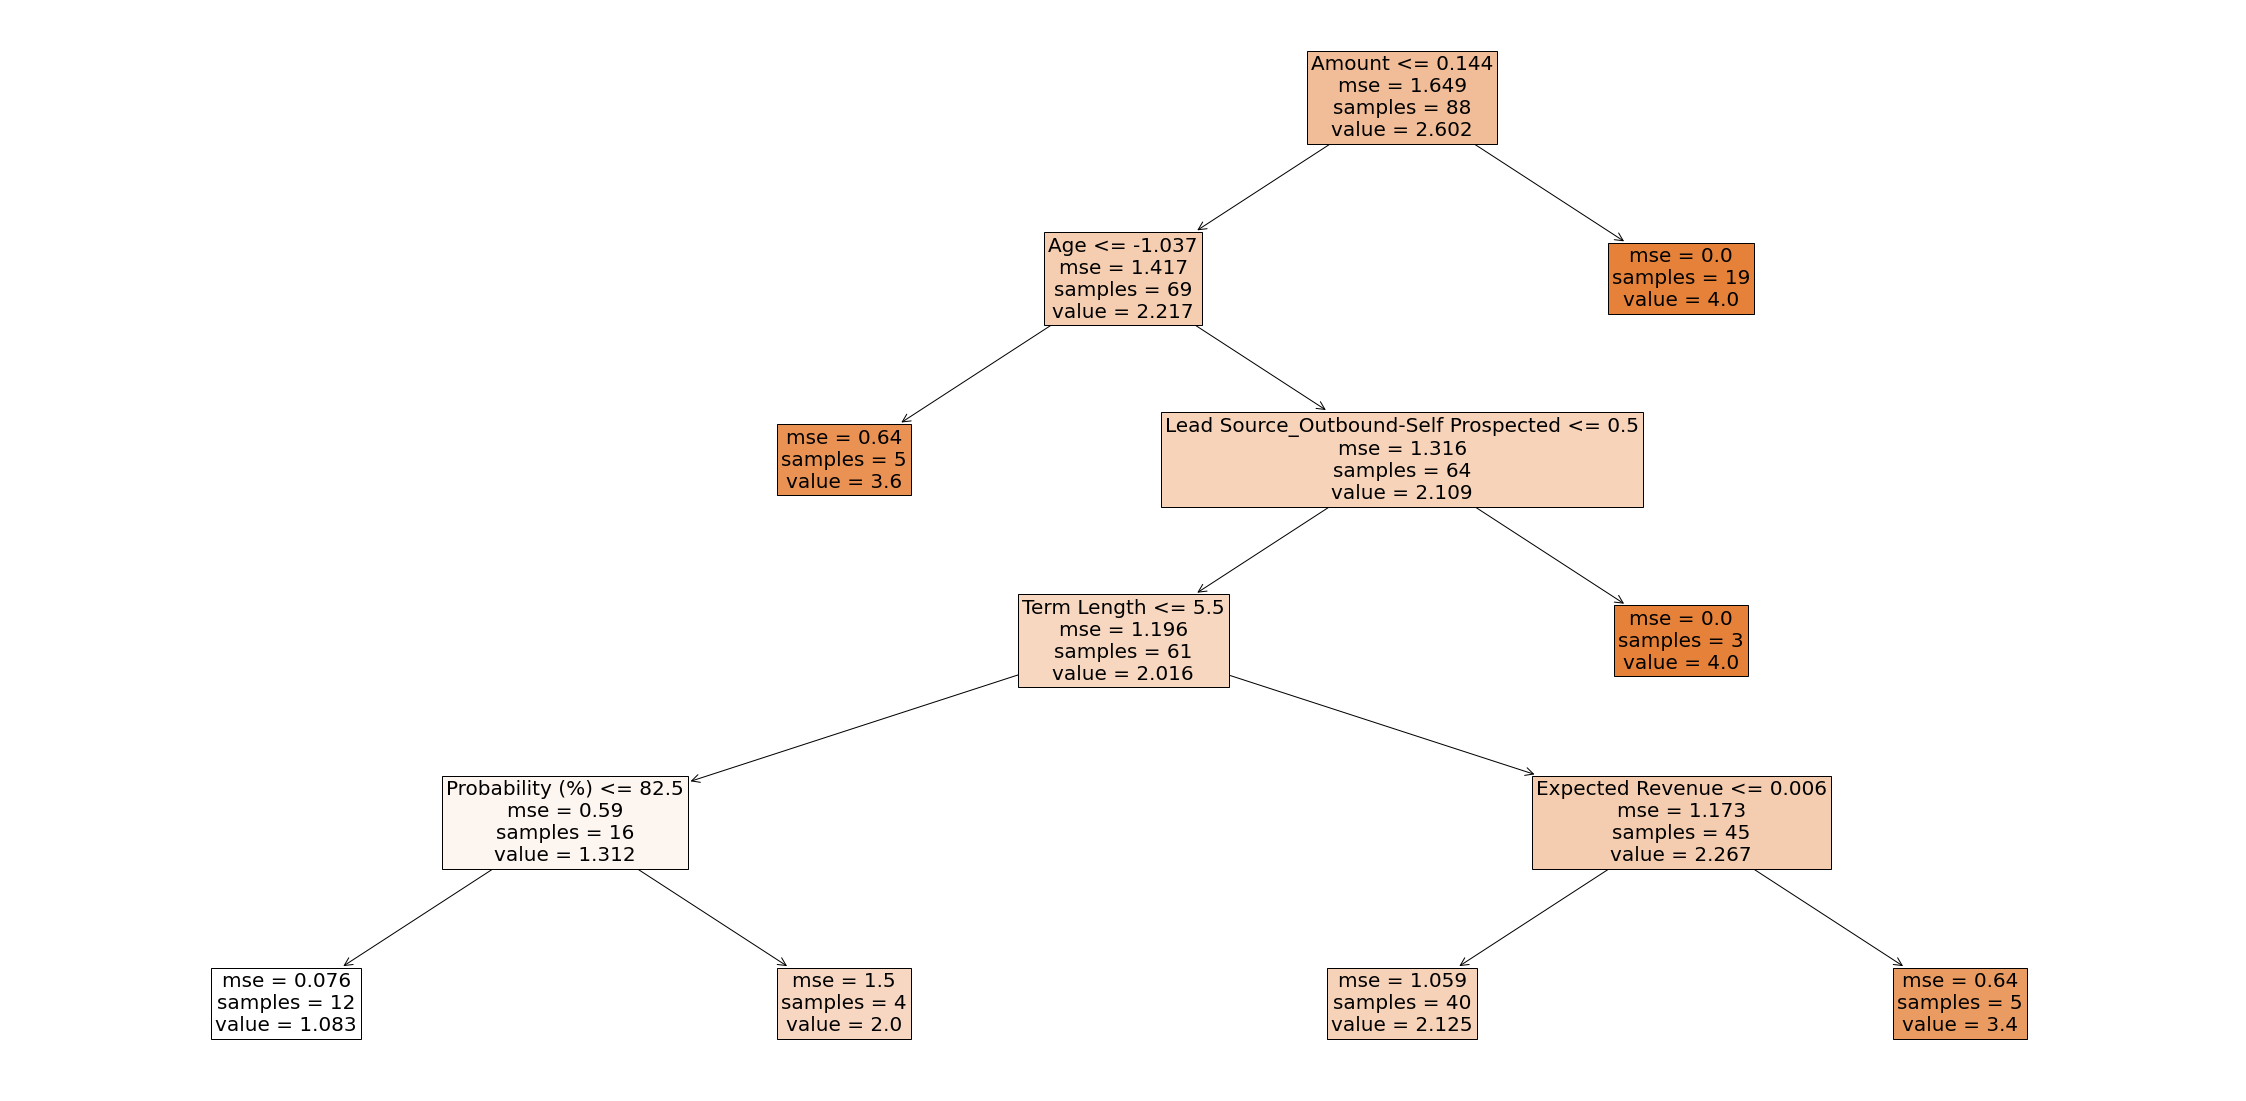

In [38]:
X = df_dummies2[feature_cols]
y  =  df_dummies2['Band']
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
decision_tree_model.fit(X_train,y_train)
plt.figure(figsize=(40,20))
tree.plot_tree(decision_tree_model, filled=True, fontsize = 20, feature_names = feature_cols)
plt.show()

In [63]:
from sklearn.metrics import accuracy_score
res_pred = decision_tree_model.predict(X_test)
res_pred=np.around(res_pred)
res_pred=pd.Series(res_pred)
res_pred=pd.to_numeric(res_pred)
res_pred

0     2.0
1     2.0
2     2.0
3     4.0
4     2.0
5     2.0
6     4.0
7     1.0
8     4.0
9     4.0
10    2.0
11    4.0
12    2.0
13    2.0
14    1.0
15    4.0
16    2.0
17    4.0
18    4.0
19    1.0
20    2.0
21    2.0
22    4.0
dtype: float64

In [64]:
score = accuracy_score(y_test, res_pred)

In [65]:
score

0.782608695652174

In [61]:
y_test=pd.to_numeric(y_test)
y_test

78     2
10     2
4      2
84     4
64     4
68     2
30     4
45     1
96     4
11     4
79     4
80     4
0      2
81     2
18     1
70     1
56     1
72     4
109    4
42     1
12     2
36     1
65     4
Name: Band, dtype: int64

In [ ]:
#Decision treee for colsed won

In [ ]:
#df_dummies1

In [2]:
df_dummies1.columns.values.tolist()

NameError: name 'df_dummies1' is not defined